# DS 4420 Final Project
#### Dennis, Heidi, & Avril

This project utilizes data on [Recipe and Interactions from Food.com](https://www.kaggle.com/datasets/shuyangli94/food-com-recipes-and-user-interactions/data?select=RAW_interactions.csv).


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

## 1. Data Cleaning
Preprocessing and splitting data

In [28]:
# load the data
users = pd.read_csv('PP_users.csv')
recipes = pd.read_csv('RAW_recipes.csv')
interactions = pd.read_csv('RAW_interactions.csv')

**a. Cleaning User Data**

In [29]:
# check shape
print('Shape:', users.shape)

# check for duplicate user id's
print('\nDuplicates:', sum(users.u.value_counts() > 1))

# check for nulls
print('\nNull Values:')
print(users.isna().astype(int).sum())

# dropping arbitrary columns
print('\nDropped Columns: n_items, techniques')
users.drop(['n_items', 'techniques'], axis=1, inplace=True)

# rename columns for consistency
users.rename(columns={'u':'user_id', 'items':'recipes'}, inplace=True)

# check datatypes
print('\nDatatypes:')
print(users.dtypes)

# display final shape
print('\nUsers Shape:', users.shape)
print('\n')

users.head()

Shape: (25076, 6)

Duplicates: 0

Null Values:
u             0
techniques    0
items         0
n_items       0
ratings       0
n_ratings     0
dtype: int64

Dropped Columns: n_items, techniques

Datatypes:
user_id       int64
recipes      object
ratings      object
n_ratings     int64
dtype: object

Users Shape: (25076, 4)




,user_id,recipes,ratings,n_ratings
0,0,"[1118, 27680, 32541, 137353, 16428, 28815, 658...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[122140, 77036, 156817, 76957, 68818, 155600, ...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,2,"[168054, 87218, 35731, 1, 20475, 9039, 124834,...","[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,3,"[163193, 156352, 102888, 19914, 169438, 55772,...","[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,4,"[72857, 38652, 160427, 55772, 119999, 141777, ...","[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376


**b. Cleaning Recipe Data**

In [33]:
# load data
recipes = pd.read_csv('RAW_recipes.csv')

# check shape
print('Shape:', recipes.shape)

# check for duplicate user id's
print('\nDuplicates:', sum(recipes.id.value_counts() > 1))

# check for nulls
print('\nNull Values:')
print(recipes.isna().astype(int).sum())

# drop null name
recipes.dropna(subset='name', inplace=True)

# rename columns for consistency
recipes.rename(columns={'id':'recipe_id'}, inplace=True)

# check datatypes
print('\nDatatypes:')
print(recipes.dtypes)

# display final shape
print('\nRecipes Shape:', recipes.shape)
print('\n')

recipes.head()

Shape: (231637, 12)

Duplicates: 0

Null Values:
name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

Datatypes:
name              object
recipe_id          int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object

Recipes Shape: (231636, 12)




,name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


**c. Cleaning Interactions Data**

In [34]:
# load data
interactions = pd.read_csv('RAW_interactions.csv')

# check shape
print('Shape:', interactions.shape)

# check for duplicate user id's
print('\nDuplicates:', sum(interactions.groupby(['user_id','recipe_id']).count().reset_index()[['user_id','recipe_id']].value_counts() > 1))

# check for nulls
print('\nNull Values:')
print(interactions.isna().astype(int).sum())

# check datatypes
print('\nDatatypes:')
print(interactions.dtypes)

# display final shape
print('\nInteractions Shape:', interactions.shape)
print('\n')

interactions.head()

Shape: (1132367, 5)

Duplicates: 0

Null Values:
user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64

Datatypes:
user_id       int64
recipe_id     int64
date         object
rating        int64
review       object
dtype: object

Interactions Shape: (1132367, 5)




,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."



Dropped Columns: n_items, techniques

Recipes (for training) Shape: (231636, 6)


Removed 0 duplicate ratings
Dataset latest date:  2018
Dataset 3 years prior to latest date:  2015


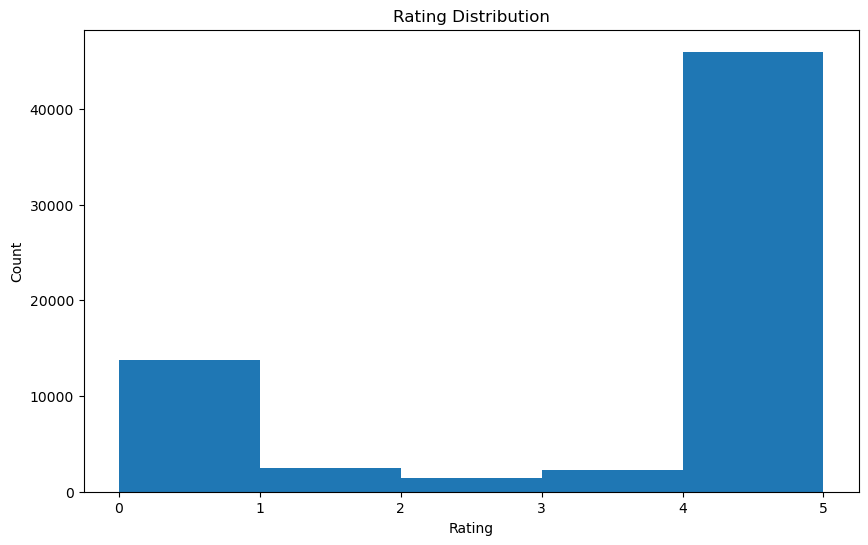

Original rating counts: rating
0    13728
1     2481
2     1383
3     2271
4     6533
5    39460
Name: count, dtype: int64
Target count per rating: 1383
Sampled 1383 from rating 1
Kept all 1383 examples of rating 2
Sampled 1383 from rating 3
Sampled 1383 from rating 4
Sampled 1383 from rating 5


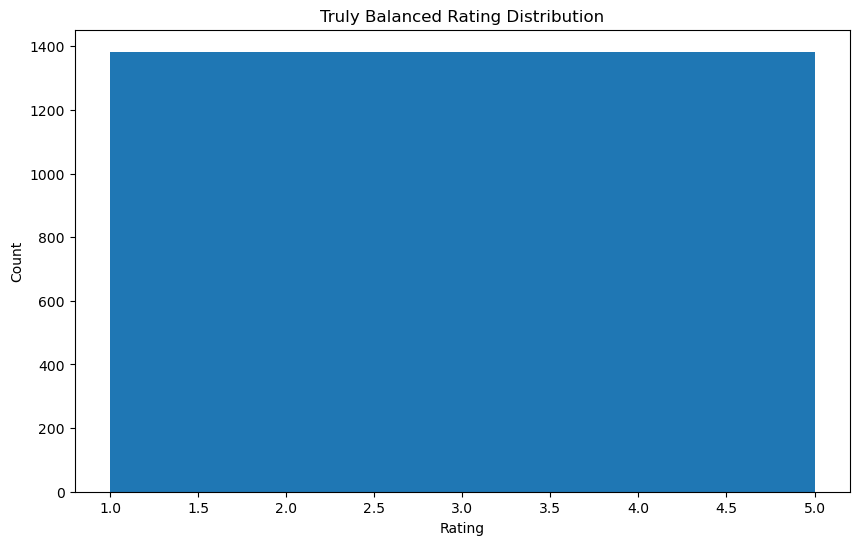

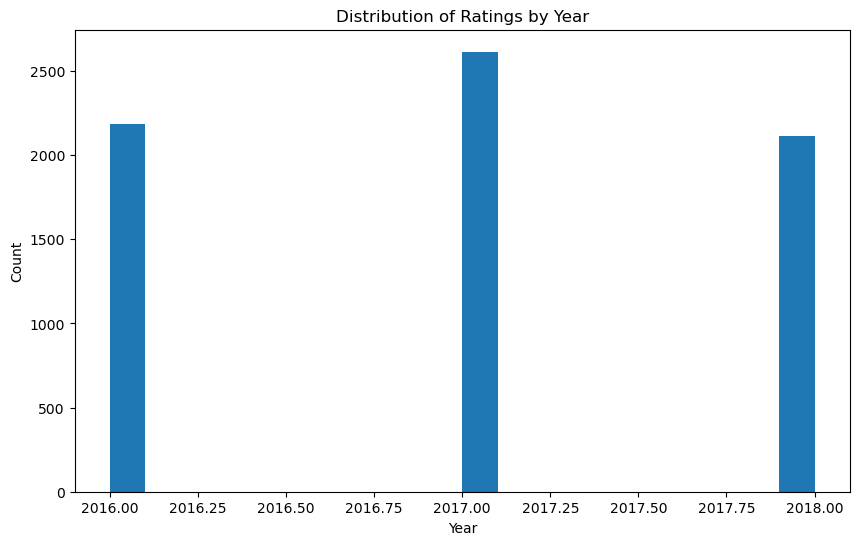

Test data after filtering for valid users/recipes: 14 rows
Training data shape: (1058, 16)
Testing data shape: (14, 16)
X_user_train dtype: int64
X_recipe_train dtype: int64
X_features_train dtype: float64
y_train dtype: int64
X_user_train shape: (1058,)
X_recipe_train shape: (1058,)
X_features_train shape: (1058, 16)
y_train shape: (1058,)


Training models:   0%|                                   | 0/10 [00:00<?, ?it/s]


Training model 1 of 10
Parameters: {'embedding_dim': 16, 'units1': 64, 'dropout1': 0.4, 'units2': 64, 'dropout2': 0.2, 'learning_rate': 0.0001, 'batch_size': 32}


Training models:  10%|██▋                        | 1/10 [00:01<00:11,  1.32s/it]


Training model 2 of 10
Parameters: {'embedding_dim': 16, 'units1': 256, 'dropout1': 0.4, 'units2': 128, 'dropout2': 0.2, 'learning_rate': 0.001, 'batch_size': 64}


Training models:  20%|█████▍                     | 2/10 [00:02<00:08,  1.10s/it]


Training model 3 of 10
Parameters: {'embedding_dim': 16, 'units1': 64, 'dropout1': 0.2, 'units2': 32, 'dropout2': 0.2, 'learning_rate': 0.001, 'batch_size': 128}


Training models:  30%|████████                   | 3/10 [00:03<00:07,  1.02s/it]


Training model 4 of 10
Parameters: {'embedding_dim': 16, 'units1': 256, 'dropout1': 0.2, 'units2': 128, 'dropout2': 0.4, 'learning_rate': 0.001, 'batch_size': 128}


Training models:  40%|██████████▊                | 4/10 [00:04<00:05,  1.06it/s]


Training model 5 of 10
Parameters: {'embedding_dim': 64, 'units1': 64, 'dropout1': 0.3, 'units2': 128, 'dropout2': 0.3, 'learning_rate': 0.0001, 'batch_size': 32}


Training models:  50%|█████████████▌             | 5/10 [00:05<00:06,  1.24s/it]


Training model 6 of 10
Parameters: {'embedding_dim': 64, 'units1': 128, 'dropout1': 0.3, 'units2': 32, 'dropout2': 0.2, 'learning_rate': 0.0005, 'batch_size': 32}


Training models:  60%|████████████████▏          | 6/10 [00:06<00:04,  1.23s/it]


Training model 7 of 10
Parameters: {'embedding_dim': 16, 'units1': 128, 'dropout1': 0.2, 'units2': 64, 'dropout2': 0.3, 'learning_rate': 0.001, 'batch_size': 64}


Training models:  70%|██████████████████▉        | 7/10 [00:07<00:03,  1.09s/it]


Training model 8 of 10
Parameters: {'embedding_dim': 16, 'units1': 256, 'dropout1': 0.3, 'units2': 128, 'dropout2': 0.2, 'learning_rate': 0.0005, 'batch_size': 32}


Training models:  80%|█████████████████████▌     | 8/10 [00:08<00:02,  1.06s/it]


Training model 9 of 10
Parameters: {'embedding_dim': 48, 'units1': 256, 'dropout1': 0.4, 'units2': 64, 'dropout2': 0.4, 'learning_rate': 0.0001, 'batch_size': 128}


Training models:  90%|████████████████████████▎  | 9/10 [00:09<00:01,  1.06s/it]


Training model 10 of 10
Parameters: {'embedding_dim': 16, 'units1': 64, 'dropout1': 0.4, 'units2': 32, 'dropout2': 0.3, 'learning_rate': 0.0001, 'batch_size': 32}


Training models: 100%|██████████████████████████| 10/10 [00:10<00:00,  1.10s/it]



Best validation MSE: 1.1311408281326294
Best validation MAE: 0.9488430023193359
Best parameters:
  embedding_dim: 16
  units1: 64
  dropout1: 0.2
  units2: 32
  dropout2: 0.2
  learning_rate: 0.001
  batch_size: 128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Test Set Metrics for Best Single Model:
Mean Absolute Error: 0.9488
Mean Squared Error: 1.1311
Root Mean Squared Error: 1.0636
R-squared: 0.3772


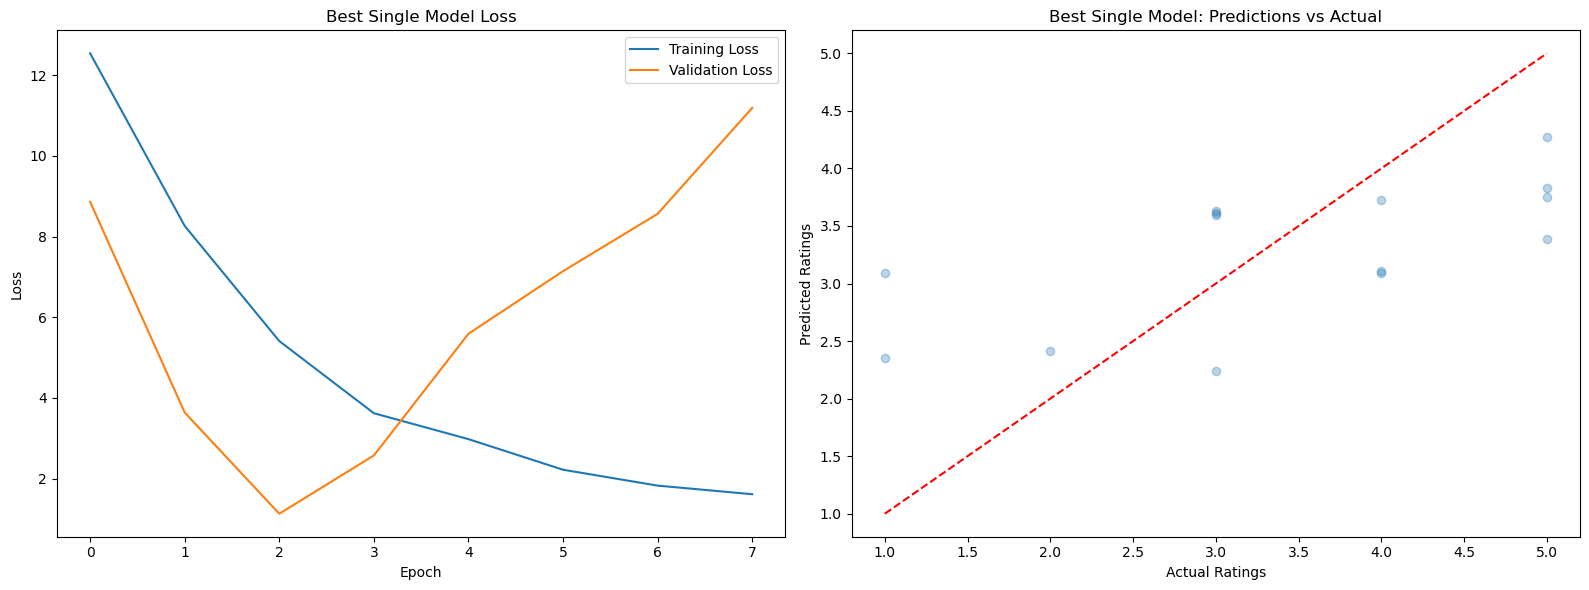



Evaluating simple ensemble model (top 3 models):

Creating ensemble from top 3 models:
Model 1 validation MSE: 1.1311408281326294
  embedding_dim: 16
  units1: 64
  dropout1: 0.2
  units2: 32
  dropout2: 0.2
  learning_rate: 0.001
  batch_size: 128
Model 2 validation MSE: 1.1628005504608154
  embedding_dim: 16
  units1: 64
  dropout1: 0.4
  units2: 64
  dropout2: 0.2
  learning_rate: 0.0001
  batch_size: 32
Model 3 validation MSE: 1.1823756694793701
  embedding_dim: 16
  units1: 64
  dropout1: 0.4
  units2: 32
  dropout2: 0.3
  learning_rate: 0.0001
  batch_size: 32
Added predictions with shape (14, 1)
Added predictions with shape (14, 1)
Added predictions with shape (14, 1)

Simple Ensemble Model Metrics:
Mean Absolute Error: 0.8570
Mean Squared Error: 1.0104
Root Mean Squared Error: 1.0052
R-squared: 0.4437


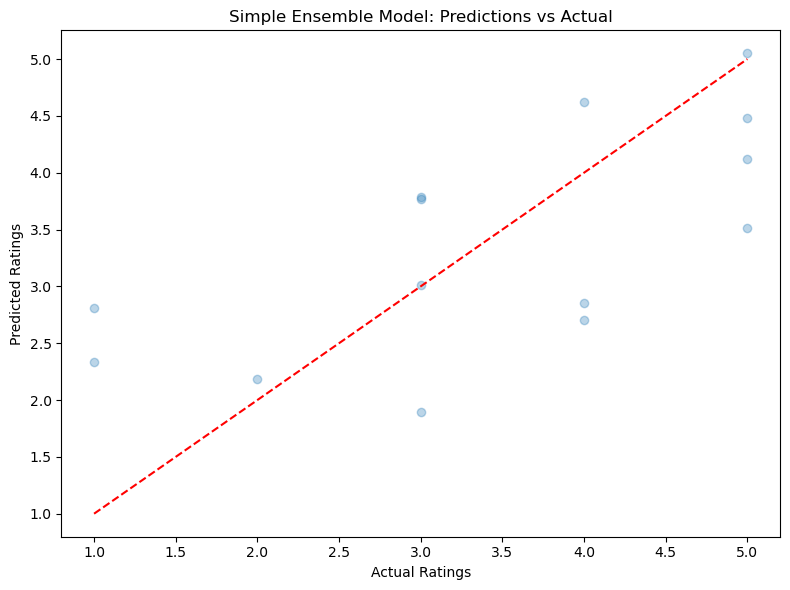



Evaluating weighted ensemble model (top 5 models):

Creating weighted ensemble from top 5 models:
Model 1 validation MSE: 1.1311408281326294
Model 2 validation MSE: 1.1628005504608154
Model 3 validation MSE: 1.1823756694793701
Model 4 validation MSE: 1.3016711473464966
Model 5 validation MSE: 1.4101840257644653
Model weights in ensemble:
  Model 1 weight: 0.2174
  Model 2 weight: 0.2114
  Model 3 weight: 0.2079
  Model 4 weight: 0.1889
  Model 5 weight: 0.1744

Weighted Ensemble Model Metrics:
Mean Absolute Error: 0.8880
Mean Squared Error: 1.0516
Root Mean Squared Error: 1.0255
R-squared: 0.4210


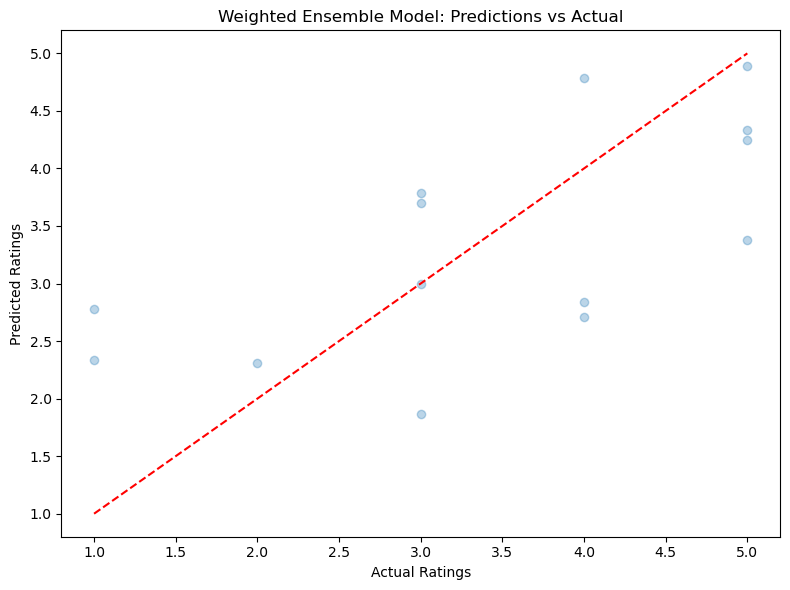

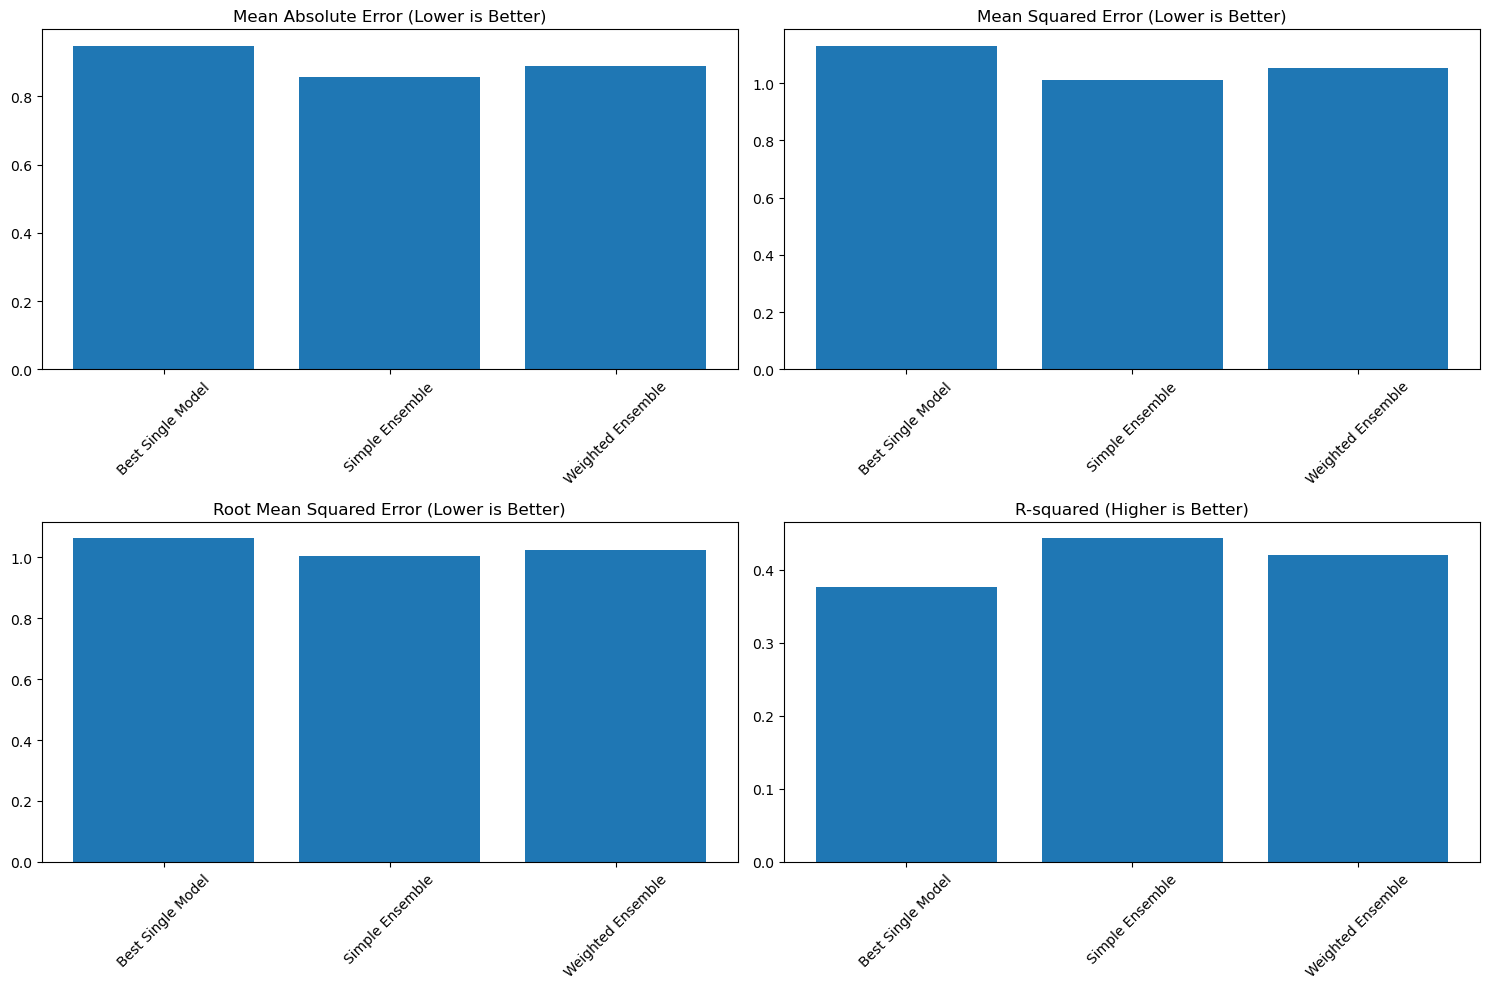

In [158]:
# RUN THIS
# load the data
users = pd.read_csv('PP_users.csv')
recipes = pd.read_csv('RAW_recipes.csv')
interactions = pd.read_csv('RAW_interactions.csv')



# dropping arbitrary columns
print('\nDropped Columns: n_items, techniques')
users.drop(['n_items', 'techniques'], axis=1, inplace=True)

# rename columns for consistency
users.rename(columns={'u':'user_id', 'items':'recipes'}, inplace=True)



# drop null name
recipes.dropna(subset='name', inplace=True)

# rename columns for consistency
recipes.rename(columns={'id':'recipe_id'}, inplace=True)



recipes_copied = recipes.copy()
interactions_copied = interactions.copy()
users_copied = interactions.copy()


# save the above data as a full df, then drop columns not used for MLP
#recipes = recipes_full.copy()
recipes.drop(['name', 'contributor_id', 'nutrition', 'submitted', 'description', 'steps'], axis=1, inplace=True)
from ast import literal_eval

# apply list transformations for relevant columns
recipes['tags'] = recipes['tags'].apply(literal_eval)
recipes['ingredients'] = recipes['ingredients'].apply(literal_eval)

# display final shape
print('\nRecipes (for training) Shape:', recipes.shape)
print('\n')
recipes.head()

# Merge recipes with ratings data
ratings = interactions.drop(['review'], axis=1)  # Keep date for seasonality features
#ratings = ratings[ratings.rating>0]

# Extract seasonality from date but keep original date
ratings['date'] = pd.to_datetime(ratings['date'])
ratings['month'] = ratings['date'].dt.month
ratings['day_of_week'] = ratings['date'].dt.dayofweek
ratings['is_weekend'] = (ratings['day_of_week'] >= 5).astype(int)
ratings['year'] = ratings['date'].dt.year

# Merge datasets
recipes_mlp = pd.merge(recipes, ratings, on='recipe_id', how='right')

# Check for duplicates and remove them
initial_rows = len(recipes_mlp)
recipes_mlp = recipes_mlp.drop_duplicates(subset=['user_id', 'recipe_id'])
print(f"Removed {initial_rows - len(recipes_mlp)} duplicate ratings")



latest_date = recipes_mlp["year"].max()
three_years_ago = latest_date - 3
print("Dataset latest date: ", latest_date)
print("Dataset 3 years prior to latest date: ", three_years_ago)
recipes_mlp = recipes_mlp[recipes_mlp["year"] > three_years_ago]
recipes_mlp.reset_index(drop=True, inplace=True)
recipes_mlp.shape



# Check rating distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(recipes_mlp['rating'], bins=5)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Create a more balanced dataset with aggressive undersampling
rating_counts = recipes_mlp['rating'].value_counts().sort_index()
print("Original rating counts:", rating_counts)

# Find a reasonable target count for each rating
# Find smallest category with >1000 examples, but cap at 50,000 to avoid too small a dataset
min_counts = [count for count in rating_counts.values if count > 1000]
if min_counts:
    target_count = min(min(min_counts), 50000)
else:
    target_count = 10000  # Fallback if no category has >1000 examples

print(f"Target count per rating: {target_count}")

balanced_df = []
for rating in range(1, 6):
    if rating in rating_counts.index:
        if rating_counts[rating] > target_count:
            # Undersample
            balanced_df.append(recipes_mlp[recipes_mlp['rating'] == rating].sample(target_count))
            print(f"Sampled {target_count} from rating {rating}")
        else:
            # Keep all
            balanced_df.append(recipes_mlp[recipes_mlp['rating'] == rating])
            print(f"Kept all {rating_counts[rating]} examples of rating {rating}")

recipes_mlp = pd.concat(balanced_df)

# Show truly balanced distribution
plt.figure(figsize=(10, 6))
plt.hist(recipes_mlp['rating'], bins=5)
plt.title('Truly Balanced Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Plot distribution of dates
plt.figure(figsize=(10, 6))
plt.hist(recipes_mlp['date'].dt.year, bins=20)
plt.title('Distribution of Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Create user and recipe maps
user_map = {id: i for i, id in enumerate(recipes_mlp['user_id'].unique())}
recipe_map = {id: i for i, id in enumerate(recipes_mlp['recipe_id'].unique())}

# Map IDs
recipes_mlp['user_id_mapped'] = recipes_mlp['user_id'].map(user_map)
recipes_mlp['recipe_id_mapped'] = recipes_mlp['recipe_id'].map(recipe_map)

# First identify users with enough ratings
user_counts = recipes_mlp['user_id'].value_counts()
valid_users = user_counts[user_counts >= 2].index

# Filter to include only valid users
recipes_mlp_filtered = recipes_mlp[recipes_mlp['user_id'].isin(valid_users)]

recipes_mlp_filtered.head()

# Optional: Sample users if dataset is too large
#np.random.seed(42)  # For reproducibility
#sampled_users = np.random.choice(valid_users, size=5000, replace=False)
#recipes_mlp_filtered = recipes_mlp_filtered[recipes_mlp_filtered['user_id'].isin(sampled_users)]

# Train-test split stratified by rating only
train_df, test_df = train_test_split(
    recipes_mlp_filtered,
    test_size=0.2,
    stratify=recipes_mlp_filtered['rating'],  # Stratify only by rating
    random_state=42
)

# Process numerical features with proper scaling (no data leakage)
from sklearn.preprocessing import StandardScaler

# Scale numeric variables separately for train and test
scaler_numeric = StandardScaler()
numeric = ['minutes', 'n_steps', 'n_ingredients', 'month', 'day_of_week', 'year']
train_df[numeric] = scaler_numeric.fit_transform(train_df[numeric])
test_df[numeric] = scaler_numeric.transform(test_df[numeric])

# Handle nutrition data properly
n_lists = [n.strip('[]').split(',') for n in recipes_copied.nutrition]
nutrition_array = np.array([
    [float(item.strip()) for item in sublist] 
    for sublist in n_lists
])

# Create nutrition DataFrame
nutrition_df = pd.DataFrame(
    nutrition_array, 
    columns=['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbs'],
    index=recipes_copied.recipe_id
)

# Scale nutrition separately for train and test
scaler_nutrition = StandardScaler()
train_nutrition = pd.merge(train_df[['recipe_id']], nutrition_df, left_on='recipe_id', right_index=True, how='left')
test_nutrition = pd.merge(test_df[['recipe_id']], nutrition_df, left_on='recipe_id', right_index=True, how='left')

# Fit scaler only on training data
train_nutrition_values = scaler_nutrition.fit_transform(train_nutrition.drop('recipe_id', axis=1))
test_nutrition_values = scaler_nutrition.transform(test_nutrition.drop('recipe_id', axis=1))

# Convert back to DataFrame
train_nutrition_scaled = pd.DataFrame(
    train_nutrition_values,
    columns=nutrition_df.columns,
    index=train_nutrition.recipe_id
)
test_nutrition_scaled = pd.DataFrame(
    test_nutrition_values,
    columns=nutrition_df.columns,
    index=test_nutrition.recipe_id
)

# Merge nutrition back with main data
train_df = pd.merge(train_df, train_nutrition_scaled, left_on='recipe_id', right_index=True, how='left')
test_df = pd.merge(test_df, test_nutrition_scaled, left_on='recipe_id', right_index=True, how='left')

# Drop the actual date field before training (but we used its features)
if 'date' in train_df.columns:
    train_df = train_df.drop('date', axis=1)
    test_df = test_df.drop('date', axis=1)
    
# Process tags - explode and one-hot encode
tags_unnested = recipes.explode('tags')[['recipe_id', 'tags']]

# Get common tags based only on training data
train_tags_unnested = tags_unnested[tags_unnested['recipe_id'].isin(train_df['recipe_id'])]
tag_count = train_tags_unnested.groupby('tags').count().sort_values(by='recipe_id', ascending=False)
common_tags = list(tag_count[tag_count.recipe_id > 50000].index)  # Reduced threshold to capture more tags

# Filter and encode tags
tags_filtered = tags_unnested[tags_unnested['tags'].isin(common_tags)]
tags_encoded = pd.get_dummies(tags_filtered, columns=['tags'], prefix='', prefix_sep='')
tags_encoded = tags_encoded.groupby('recipe_id').sum().reset_index()

# Add tags to train and test separately
train_df = pd.merge(train_df, tags_encoded, on='recipe_id', how='left')
test_df = pd.merge(test_df, tags_encoded, on='recipe_id', how='left')

# Fill NaN values with median for each column (better than filling with 0)
'''for col in train_df.columns:
    if train_df[col].dtype in [np.float64, np.int64] and col not in ['user_id', 'recipe_id', 'rating', 'user_id_mapped', 'recipe_id_mapped']:
        median_val = train_df[col].median()
        train_df[col] = train_df[col].fillna(median_val)
        test_df[col] = test_df[col].fillna(median_val)'''

# Add user and recipe biases as features
user_avg = train_df.groupby('user_id')['rating'].mean()
recipe_avg = train_df.groupby('recipe_id')['rating'].mean()
global_avg = train_df['rating'].mean()

# Add these as features
train_df['user_bias'] = train_df['user_id'].map(user_avg) - global_avg
test_df['user_bias'] = test_df['user_id'].map(user_avg).fillna(0)  # Use 0 for unknown users

train_df['recipe_bias'] = train_df['recipe_id'].map(recipe_avg) - global_avg
test_df['recipe_bias'] = test_df['recipe_id'].map(recipe_avg).fillna(0)  # Use 0 for unknown recipes

test_df = test_df.drop('tags',axis=1)
test_df = test_df.drop('ingredients',axis=1)
train_df = train_df.drop('tags',axis=1)
train_df = train_df.drop('ingredients',axis=1)


# RUN THIS
# Apply cleaning to train data
#train_df_clean = clean_recommendation_data(train_df)

train_df_clean = train_df.copy()


# For test data, only keep entries that match users and recipes in cleaned train data
valid_users = set(train_df_clean['user_id'])
valid_recipes = set(train_df_clean['recipe_id'])
test_df_clean = test_df[test_df['user_id'].isin(valid_users) & test_df['recipe_id'].isin(valid_recipes)]
print(f"Test data after filtering for valid users/recipes: {len(test_df_clean)} rows")

# Extract features for modeling
X_user_train = train_df_clean['user_id_mapped'].values
X_recipe_train = train_df_clean['recipe_id_mapped'].values
y_train = train_df_clean['rating'].values

X_user_test = test_df_clean['user_id_mapped'].values
X_recipe_test = test_df_clean['recipe_id_mapped'].values
y_test = test_df_clean['rating'].values

# Extract other features, excluding IDs and target
feature_cols = [col for col in train_df_clean.columns 
                if col not in ['user_id', 'recipe_id', 'rating', 'user_id_mapped', 'recipe_id_mapped']]

X_features_train = train_df_clean[feature_cols].values
X_features_test = test_df_clean[feature_cols].values

# Final nan check and replacement
X_features_train = np.nan_to_num(X_features_train, nan=0)
X_features_test = np.nan_to_num(X_features_test, nan=0)

print("Training data shape:", X_features_train.shape)
print("Testing data shape:", X_features_test.shape)


#RUN THIS

# Check data types
print("X_user_train dtype:", X_user_train.dtype)
print("X_recipe_train dtype:", X_recipe_train.dtype)
print("X_features_train dtype:", X_features_train.dtype)
print("y_train dtype:", y_train.dtype)

# Convert arrays to proper numeric types
X_user_train = X_user_train.astype(np.int32)
X_recipe_train = X_recipe_train.astype(np.int32)
X_features_train = X_features_train.astype(np.float32)
y_train = y_train.astype(np.float32)

X_user_test = X_user_test.astype(np.int32)
X_recipe_test = X_recipe_test.astype(np.int32)
X_features_test = X_features_test.astype(np.float32)
y_test = y_test.astype(np.float32)

# Verify data shapes
print("X_user_train shape:", X_user_train.shape)
print("X_recipe_train shape:", X_recipe_train.shape)
print("X_featurres_train shape:", X_features_train.shape)
print("y_train shape:", y_train.shape)


# uses random grid search, also finds best combination of hyperparameters
# and implements ensemble method

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Dropout, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

# Define hyperparameter grid
param_grid = {
    'embedding_dim': [16, 32, 48, 64],
    'units1': [64, 128, 256],
    'dropout1': [0.2, 0.3, 0.4],
    'units2': [32, 64, 128],
    'dropout2': [0.2, 0.3, 0.4],
    'learning_rate': [0.0001, 0.0005, 0.001],
    'batch_size': [32, 64, 128]
}

# Function to create model with specific parameters
def create_model(params, user_map, recipe_map, X_features_shape):
    # Define input layers
    user_input = Input(shape=(1,), name='user_input')
    recipe_input = Input(shape=(1,), name='recipe_input')
    features_input = Input(shape=(X_features_shape,), name='features_input')
    
    # Embedding layers
    user_embedding = Embedding(input_dim=len(user_map), 
                              output_dim=params['embedding_dim'])(user_input)
    user_embedding = Flatten()(user_embedding)
    
    recipe_embedding = Embedding(input_dim=len(recipe_map), 
                                output_dim=params['embedding_dim'])(recipe_input)
    recipe_embedding = Flatten()(recipe_embedding)
    
    # Process features
    features_processed = Dense(params['units1'], activation='relu')(features_input)
    features_processed = Dropout(params['dropout1'])(features_processed)
    
    # Combine all features
    combined = Concatenate()([user_embedding, recipe_embedding, features_processed])
    
    # Hidden layers
    x = Dense(params['units1'], activation='relu')(combined)
    x = Dropout(params['dropout1'])(x)
    x = Dense(params['units2'], activation='relu')(x)
    x = Dropout(params['dropout2'])(x)
    
    # Output layer
    output = Dense(1, activation='linear')(x)
    
    # Create model
    model = Model(
        inputs=[user_input, recipe_input, features_input],
        outputs=output
    )
    
    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=params['learning_rate']),
        loss='mean_squared_error',
        metrics=['mae', 'mse']
    )
    
    return model

# Function to train and evaluate model
def train_evaluate_model(params, X_user_train, X_recipe_train, X_features_train, y_train,
                        X_user_test, X_recipe_test, X_features_test, y_test,
                        user_map, recipe_map):
    try:
        # Create model
        model = create_model(params, user_map, recipe_map, X_features_train.shape[1])
        
        # Callbacks
        callbacks = [
            EarlyStopping(
                monitor='val_loss',
                patience=5,
                restore_best_weights=True,
                verbose=0
            )
        ]
        
        # Train model
        history = model.fit(
            [X_user_train, X_recipe_train, X_features_train],
            y_train,
            validation_data=([X_user_test, X_recipe_test, X_features_test], y_test),
            epochs=10,  # Limit for random search
            batch_size=params['batch_size'],
            callbacks=callbacks,
            verbose=0
        )
        
        # Get validation metrics
        val_mse = min(history.history['val_loss'])
        val_mae = min(history.history['val_mae'])
        
        return {
            'model': model, 
            'val_mse': val_mse,
            'val_mae': val_mae,
            'params': params,
            'history': history
        }
    
    except Exception as e:
        print(f"Error with parameters {params}: {str(e)}")
        return {
            'model': None, 
            'val_mse': float('inf'),
            'val_mae': float('inf'), 
            'params': params,
            'history': None
        }

# Function to perform random grid search
def random_grid_search(param_grid, n_iter, X_user_train, X_recipe_train, X_features_train, y_train,
                      X_user_test, X_recipe_test, X_features_test, y_test,
                      user_map, recipe_map):
    # Generate n_iter random parameter combinations
    param_combinations = []
    for _ in range(n_iter):
        params = {k: random.choice(v) for k, v in param_grid.items()}
        param_combinations.append(params)
    
    # Train and evaluate models
    results = []
    for i, params in enumerate(tqdm(param_combinations, desc="Training models")):
        print(f"\nTraining model {i+1} of {n_iter}")
        print(f"Parameters: {params}")
        
        result = train_evaluate_model(
            params, X_user_train, X_recipe_train, X_features_train, y_train,
            X_user_test, X_recipe_test, X_features_test, y_test,
            user_map, recipe_map
        )
        
        results.append(result)
    
    # Find best model
    best_result = min(results, key=lambda x: x['val_mse'])
    
    return results, best_result

# Function to create ensemble predictions from multiple models
def create_ensemble(results, X_user_test, X_recipe_test, X_features_test, y_test, top_n=3):
    """
    Create an ensemble from the top N models based on validation MSE.
    
    Args:
        results: List of model results from random_grid_search
        X_user_test, X_recipe_test, X_features_test: Test inputs
        y_test: Test target values
        top_n: Number of top models to include in ensemble
    
    Returns:
        Ensemble predictions and metrics
    """
    # Sort results by validation MSE (lower is better)
    sorted_results = sorted(results, key=lambda x: x.get('val_mse', float('inf')))
    
    # Take the top N models
    top_models = sorted_results[:top_n]
    print(f"\nCreating ensemble from top {top_n} models:")
    for i, result in enumerate(top_models):
        print(f"Model {i+1} validation MSE: {result.get('val_mse', 'Not available')}")
        for param, value in result['params'].items():
            print(f"  {param}: {value}")
    
    # Make predictions with each model
    predictions_list = []
    for result in top_models:
        model = result['model']
        if model is not None:
            preds = model.predict([X_user_test, X_recipe_test, X_features_test], verbose=0)
            predictions_list.append(preds.flatten())
            print(f"Added predictions with shape {preds.shape}")
    
    # Check if we have any valid predictions
    if len(predictions_list) == 0:
        print("No valid models found for ensemble")
        return None
    
    # Combine predictions (simple average)
    ensemble_predictions = np.mean(predictions_list, axis=0)
    
    # Calculate metrics
    mae = np.mean(np.abs(y_test - ensemble_predictions))
    mse = np.mean((y_test - ensemble_predictions)**2)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, ensemble_predictions)
    
    return {
        'predictions': ensemble_predictions,
        'mae': mae,
        'mse': mse,
        'rmse': rmse,
        'r2': r2
    }

# Function to create a weighted ensemble based on validation performance
def create_weighted_ensemble(results, X_user_test, X_recipe_test, X_features_test, y_test, top_n=3):
    """
    Create a weighted ensemble from the top N models based on validation MSE.
    Models with lower validation MSE get higher weights.
    """
    # Sort results by validation MSE (lower is better)
    sorted_results = sorted(results, key=lambda x: x.get('val_mse', float('inf')))
    
    # Take the top N models
    top_models = sorted_results[:top_n]
    print(f"\nCreating weighted ensemble from top {top_n} models:")
    
    # Make predictions with each model
    predictions_list = []
    val_mse_list = []
    
    for i, result in enumerate(top_models):
        model = result['model']
        val_mse = result.get('val_mse', float('inf'))
        
        if model is not None and val_mse < float('inf'):
            preds = model.predict([X_user_test, X_recipe_test, X_features_test], verbose=0)
            predictions_list.append(preds.flatten())
            val_mse_list.append(val_mse)
            print(f"Model {i+1} validation MSE: {val_mse}")
    
    # Check if we have any valid predictions
    if len(predictions_list) == 0:
        print("No valid models found for ensemble")
        return None
    
    # Calculate weights (inverse of MSE)
    weights = [1.0/mse for mse in val_mse_list]
    normalized_weights = [w/sum(weights) for w in weights]
    
    print("Model weights in ensemble:")
    for i, w in enumerate(normalized_weights):
        print(f"  Model {i+1} weight: {w:.4f}")
    
    # Combine predictions with weights
    ensemble_predictions = np.zeros_like(predictions_list[0])
    for i, preds in enumerate(predictions_list):
        ensemble_predictions += normalized_weights[i] * preds
    
    # Calculate metrics
    mae = np.mean(np.abs(y_test - ensemble_predictions))
    mse = np.mean((y_test - ensemble_predictions)**2)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, ensemble_predictions)
    
    return {
        'predictions': ensemble_predictions,
        'mae': mae,
        'mse': mse,
        'rmse': rmse,
        'r2': r2
    }

# Main execution
def main():
    # Assuming these variables are already defined in your environment:
    # X_user_train, X_recipe_train, X_features_train, y_train
    # X_user_test, X_recipe_test, X_features_test, y_test
    # user_map, recipe_map
    
    # Set random seed for reproducibility
    np.random.seed(42)
    tf.random.set_seed(42)
    random.seed(42)
    
    # Perform random grid search
    n_iter = 10  # Number of random combinations to try
    results, best_result = random_grid_search(
        param_grid, n_iter, 
        X_user_train, X_recipe_train, X_features_train, y_train,
        X_user_test, X_recipe_test, X_features_test, y_test,
        user_map, recipe_map
    )
    
    # Print best parameters
    print("\n\nBest validation MSE:", best_result['val_mse'])
    print("Best validation MAE:", best_result['val_mae'])
    print("Best parameters:")
    for param, value in best_result['params'].items():
        print(f"  {param}: {value}")
    
    # Evaluate best model on test set
    best_model = best_result['model']
    if best_model is not None:
        # Make predictions
        predictions = best_model.predict(
            [X_user_test, X_recipe_test, X_features_test]
        )
        
        # Ensure predictions is the right shape
        predictions = predictions.flatten()
        
        # Calculate metrics
        mae = np.mean(np.abs(y_test - predictions))
        mse = np.mean((y_test - predictions)**2)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, predictions)
        
        # Print metrics
        print("\nTest Set Metrics for Best Single Model:")
        print(f"Mean Absolute Error: {mae:.4f}")
        print(f"Mean Squared Error: {mse:.4f}")
        print(f"Root Mean Squared Error: {rmse:.4f}")
        print(f"R-squared: {r2:.4f}")
        
        # Plot results
        plt.figure(figsize=(16, 6))
        
        # Plot training history
        plt.subplot(1, 2, 1)
        plt.plot(best_result['history'].history['loss'], label='Training Loss')
        plt.plot(best_result['history'].history['val_loss'], label='Validation Loss')
        plt.title('Best Single Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        
        # Plot predictions vs actual
        plt.subplot(1, 2, 2)
        plt.scatter(y_test, predictions, alpha=0.3)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
        plt.xlabel('Actual Ratings')
        plt.ylabel('Predicted Ratings')
        plt.title('Best Single Model: Predictions vs Actual')
        plt.tight_layout()
        plt.show()
    
    # Create simple ensemble
    print("\n\nEvaluating simple ensemble model (top 3 models):")
    ensemble_results = create_ensemble(
        results, 
        X_user_test, X_recipe_test, X_features_test, 
        y_test,
        top_n=3
    )
    
    if ensemble_results:
        # Print ensemble metrics
        print("\nSimple Ensemble Model Metrics:")
        print(f"Mean Absolute Error: {ensemble_results['mae']:.4f}")
        print(f"Mean Squared Error: {ensemble_results['mse']:.4f}")
        print(f"Root Mean Squared Error: {ensemble_results['rmse']:.4f}")
        print(f"R-squared: {ensemble_results['r2']:.4f}")
        
        # Plot ensemble results
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, ensemble_results['predictions'], alpha=0.3)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
        plt.xlabel('Actual Ratings')
        plt.ylabel('Predicted Ratings')
        plt.title('Simple Ensemble Model: Predictions vs Actual')
        plt.tight_layout()
        plt.show()
    
    # Create weighted ensemble
    print("\n\nEvaluating weighted ensemble model (top 5 models):")
    weighted_ensemble_results = create_weighted_ensemble(
        results, 
        X_user_test, X_recipe_test, X_features_test, 
        y_test,
        top_n=5
    )
    
    if weighted_ensemble_results:
        # Print weighted ensemble metrics
        print("\nWeighted Ensemble Model Metrics:")
        print(f"Mean Absolute Error: {weighted_ensemble_results['mae']:.4f}")
        print(f"Mean Squared Error: {weighted_ensemble_results['mse']:.4f}")
        print(f"Root Mean Squared Error: {weighted_ensemble_results['rmse']:.4f}")
        print(f"R-squared: {weighted_ensemble_results['r2']:.4f}")
        
        # Plot weighted ensemble results
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, weighted_ensemble_results['predictions'], alpha=0.3)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
        plt.xlabel('Actual Ratings')
        plt.ylabel('Predicted Ratings')
        plt.title('Weighted Ensemble Model: Predictions vs Actual')
        plt.tight_layout()
        plt.show()
        
        # Compare all methods
        methods = ['Best Single Model', 'Simple Ensemble', 'Weighted Ensemble']
        mae_values = [mae, ensemble_results['mae'], weighted_ensemble_results['mae']]
        mse_values = [mse, ensemble_results['mse'], weighted_ensemble_results['mse']]
        rmse_values = [rmse, ensemble_results['rmse'], weighted_ensemble_results['rmse']]
        r2_values = [r2, ensemble_results['r2'], weighted_ensemble_results['r2']]
        
        # Plot comparison
        plt.figure(figsize=(15, 10))
        
        plt.subplot(2, 2, 1)
        plt.bar(methods, mae_values)
        plt.title('Mean Absolute Error (Lower is Better)')
        plt.xticks(rotation=45)
        
        plt.subplot(2, 2, 2)
        plt.bar(methods, mse_values)
        plt.title('Mean Squared Error (Lower is Better)')
        plt.xticks(rotation=45)
        
        plt.subplot(2, 2, 3)
        plt.bar(methods, rmse_values)
        plt.title('Root Mean Squared Error (Lower is Better)')
        plt.xticks(rotation=45)
        
        plt.subplot(2, 2, 4)
        plt.bar(methods, r2_values)
        plt.title('R-squared (Higher is Better)')
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
    
    # Return results for further use if needed
    return {
        'best_single_model': {
            'model': best_model,
            'params': best_result['params'],
            'mae': mae,
            'mse': mse,
            'rmse': rmse,
            'r2': r2
        },
        'simple_ensemble': ensemble_results,
        'weighted_ensemble': weighted_ensemble_results
    }

if __name__ == "__main__":
    main()


In [164]:
len(user_map)

6028

In [165]:
recipes_mlp

,recipe_id,minutes,tags,n_steps,ingredients,n_ingredients,user_id,date,rating,month,day_of_week,is_weekend,year,user_id_mapped,recipe_id_mapped
6131,88564,65.0,"[time-to-make, main-ingredient, preparation, l...",6.0,"[water, brown rice]",2.0,2002262134,2018-08-31,1,8,4,0,2018,0,0
16410,493461,40.0,"[weeknight, 60-minutes-or-less, time-to-make, ...",8.0,"[olive oil, leeks, onion, garlic cloves, chick...",8.0,2001908075,2018-01-02,1,1,1,0,2018,1,1
44788,10852,32.0,"[60-minutes-or-less, time-to-make, course, mai...",12.0,"[trout, olive oil, garlic, fresh ground black ...",11.0,2002239689,2018-08-05,1,8,6,1,2018,2,2
46527,58944,27.0,"[30-minutes-or-less, time-to-make, course, mai...",8.0,"[shortening, flour, all-purpose flour, chicken...",5.0,2000956700,2016-04-04,1,4,0,0,2016,3,3
21141,67256,75.0,"[weeknight, time-to-make, course, main-ingredi...",18.0,"[bananas, lemon juice, flour, baking soda, sal...",13.0,2000708812,2016-03-09,1,3,2,0,2016,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35060,282503,65.0,"[time-to-make, course, cuisine, preparation, o...",14.0,"[yellow cake mix, water, vegetable oil, eggs, ...",8.0,571185,2016-09-17,5,9,5,1,2016,6024,4810
29167,208414,75.0,"[time-to-make, course, main-ingredient, prepar...",14.0,"[granulated sugar, light brown sugar, ground c...",15.0,2001377419,2017-02-04,5,2,5,1,2017,6025,4811
46058,59122,60.0,"[60-minutes-or-less, time-to-make, course, mai...",10.0,"[boneless chicken breasts, round steaks, pork ...",12.0,1948918,2017-05-22,5,5,0,0,2017,2028,4812
38118,145038,95.0,"[time-to-make, course, main-ingredient, prepar...",6.0,"[chicken legs, olive oil, soy sauce, ketchup, ...",7.0,2002095670,2018-04-04,5,4,2,0,2018,6026,1647


def get_recipe_detail(r):
    return recipes_full[recipes_full.recipe_id==r][['recipe_id','name','tags','description']]

get_recipe_detail(137739)

In [135]:
# RUN THIS
# load the data
users = pd.read_csv('PP_users.csv')
recipes = pd.read_csv('RAW_recipes.csv')
interactions = pd.read_csv('RAW_interactions.csv')


# check shape
print('Shape:', users.shape)

# check for duplicate user id's
print('\nDuplicates:', sum(users.u.value_counts() > 1))

# check for nulls
print('\nNull Values:')
print(users.isna().astype(int).sum())

# dropping arbitrary columns
print('\nDropped Columns: n_items, techniques')
users.drop(['n_items', 'techniques'], axis=1, inplace=True)

# rename columns for consistency
users.rename(columns={'u':'user_id', 'items':'recipes'}, inplace=True)

# check datatypes
print('\nDatatypes:')
print(users.dtypes)

# display final shape
print('\nUsers Shape:', users.shape)
print('\n')



# load data
recipes = pd.read_csv('RAW_recipes.csv')

# check shape
print('Shape:', recipes.shape)

# check for duplicate user id's
print('\nDuplicates:', sum(recipes.id.value_counts() > 1))

# check for nulls
print('\nNull Values:')
print(recipes.isna().astype(int).sum())

# drop null name
recipes.dropna(subset='name', inplace=True)

# rename columns for consistency
recipes.rename(columns={'id':'recipe_id'}, inplace=True)

# check datatypes
print('\nDatatypes:')
print(recipes.dtypes)

# display final shape
print('\nRecipes Shape:', recipes.shape)
print('\n')


# load data
interactions = pd.read_csv('RAW_interactions.csv')

# check shape
print('Shape:', interactions.shape)

# check for duplicate user id's
print('\nDuplicates:', sum(interactions.groupby(['user_id','recipe_id']).count().reset_index()[['user_id','recipe_id']].value_counts() > 1))

# check for nulls
print('\nNull Values:')
print(interactions.isna().astype(int).sum())

# check datatypes
print('\nDatatypes:')
print(interactions.dtypes)

# display final shape
print('\nInteractions Shape:', interactions.shape)
print('\n')

recipes_copied = recipes.copy()
interactions_copied = interactions.copy()
users_copied = interactions.copy()

Shape: (25076, 6)

Duplicates: 0

Null Values:
u             0
techniques    0
items         0
n_items       0
ratings       0
n_ratings     0
dtype: int64

Dropped Columns: n_items, techniques

Datatypes:
user_id       int64
recipes      object
ratings      object
n_ratings     int64
dtype: object

Users Shape: (25076, 4)


Shape: (231637, 12)

Duplicates: 0

Null Values:
name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

Datatypes:
name              object
recipe_id          int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object

Recipes 

## Claude Ver


Recipes (for training) Shape: (231636, 6)


Removed 0 duplicate ratings
Dataset latest date:  2018
Dataset 3 years prior to latest date:  2015


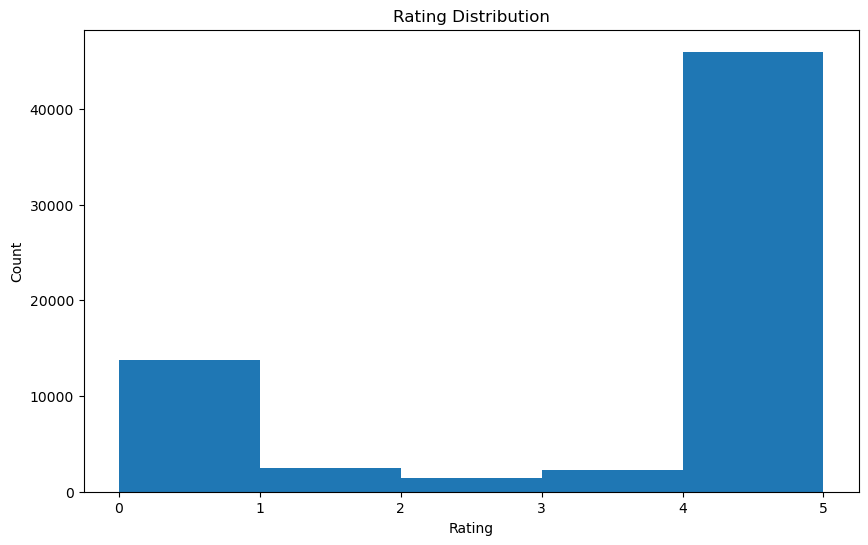

Original rating counts: rating
0    13728
1     2481
2     1383
3     2271
4     6533
5    39460
Name: count, dtype: int64
Target count per rating: 1383
Sampled 1383 from rating 1
Kept all 1383 examples of rating 2
Sampled 1383 from rating 3
Sampled 1383 from rating 4
Sampled 1383 from rating 5


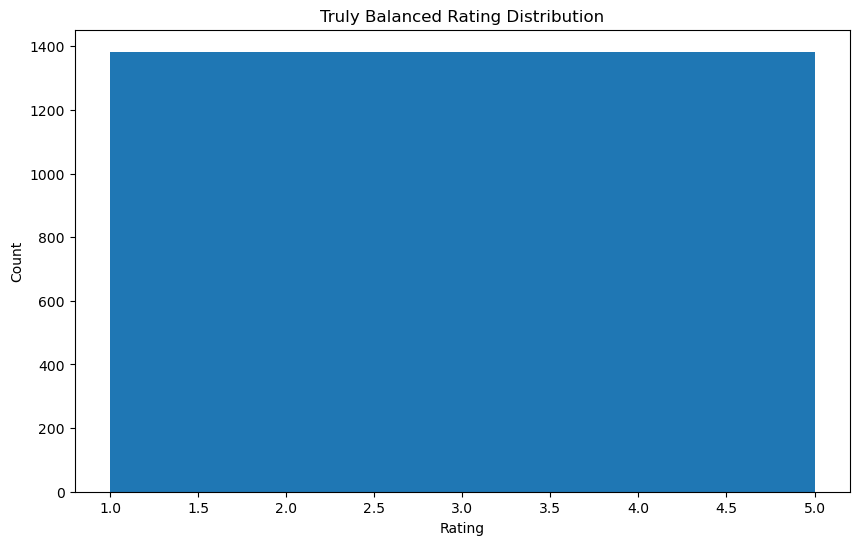

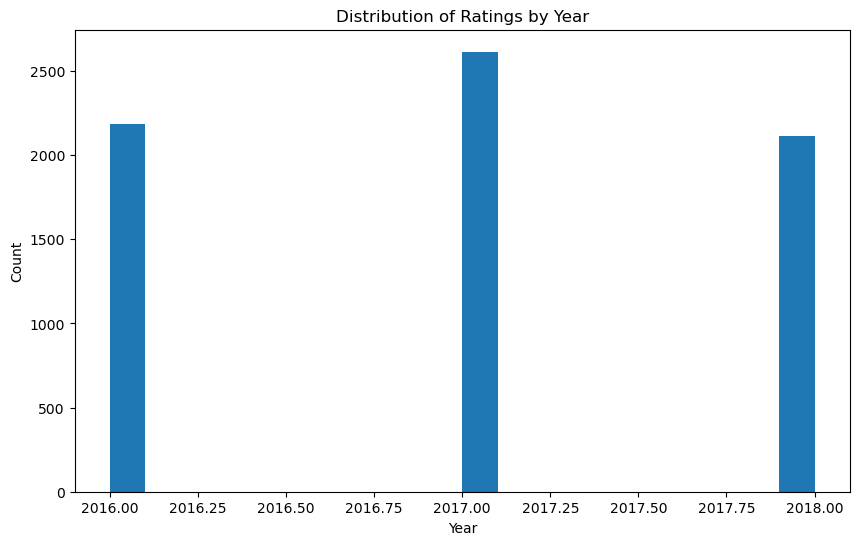

In [136]:
# RUN THIS
# save the above data as a full df, then drop columns not used for MLP
#recipes = recipes_full.copy()
recipes.drop(['name', 'contributor_id', 'nutrition', 'submitted', 'description', 'steps'], axis=1, inplace=True)
from ast import literal_eval

# apply list transformations for relevant columns
recipes['tags'] = recipes['tags'].apply(literal_eval)
recipes['ingredients'] = recipes['ingredients'].apply(literal_eval)

# display final shape
print('\nRecipes (for training) Shape:', recipes.shape)
print('\n')
recipes.head()

# Merge recipes with ratings data
ratings = interactions.drop(['review'], axis=1)  # Keep date for seasonality features
#ratings = ratings[ratings.rating>0]

# Extract seasonality from date but keep original date
ratings['date'] = pd.to_datetime(ratings['date'])
ratings['month'] = ratings['date'].dt.month
ratings['day_of_week'] = ratings['date'].dt.dayofweek
ratings['is_weekend'] = (ratings['day_of_week'] >= 5).astype(int)
ratings['year'] = ratings['date'].dt.year

# Merge datasets
recipes_mlp = pd.merge(recipes, ratings, on='recipe_id', how='right')

# Check for duplicates and remove them
initial_rows = len(recipes_mlp)
recipes_mlp = recipes_mlp.drop_duplicates(subset=['user_id', 'recipe_id'])
print(f"Removed {initial_rows - len(recipes_mlp)} duplicate ratings")



latest_date = recipes_mlp["year"].max()
three_years_ago = latest_date - 3
print("Dataset latest date: ", latest_date)
print("Dataset 3 years prior to latest date: ", three_years_ago)
recipes_mlp = recipes_mlp[recipes_mlp["year"] > three_years_ago]
recipes_mlp.reset_index(drop=True, inplace=True)
recipes_mlp.shape



# Check rating distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(recipes_mlp['rating'], bins=5)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Create a more balanced dataset with aggressive undersampling
rating_counts = recipes_mlp['rating'].value_counts().sort_index()
print("Original rating counts:", rating_counts)

# Find a reasonable target count for each rating
# Find smallest category with >1000 examples, but cap at 50,000 to avoid too small a dataset
min_counts = [count for count in rating_counts.values if count > 1000]
if min_counts:
    target_count = min(min(min_counts), 50000)
else:
    target_count = 10000  # Fallback if no category has >1000 examples

print(f"Target count per rating: {target_count}")

balanced_df = []
for rating in range(1, 6):
    if rating in rating_counts.index:
        if rating_counts[rating] > target_count:
            # Undersample
            balanced_df.append(recipes_mlp[recipes_mlp['rating'] == rating].sample(target_count))
            print(f"Sampled {target_count} from rating {rating}")
        else:
            # Keep all
            balanced_df.append(recipes_mlp[recipes_mlp['rating'] == rating])
            print(f"Kept all {rating_counts[rating]} examples of rating {rating}")

recipes_mlp = pd.concat(balanced_df)

# Show truly balanced distribution
plt.figure(figsize=(10, 6))
plt.hist(recipes_mlp['rating'], bins=5)
plt.title('Truly Balanced Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Plot distribution of dates
plt.figure(figsize=(10, 6))
plt.hist(recipes_mlp['date'].dt.year, bins=20)
plt.title('Distribution of Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Create user and recipe maps
user_map = {id: i for i, id in enumerate(recipes_mlp['user_id'].unique())}
recipe_map = {id: i for i, id in enumerate(recipes_mlp['recipe_id'].unique())}

# Map IDs
recipes_mlp['user_id_mapped'] = recipes_mlp['user_id'].map(user_map)
recipes_mlp['recipe_id_mapped'] = recipes_mlp['recipe_id'].map(recipe_map)

# First identify users with enough ratings
user_counts = recipes_mlp['user_id'].value_counts()
valid_users = user_counts[user_counts >= 2].index

# Filter to include only valid users
recipes_mlp_filtered = recipes_mlp[recipes_mlp['user_id'].isin(valid_users)]

recipes_mlp_filtered.head()

# Optional: Sample users if dataset is too large
#np.random.seed(42)  # For reproducibility
#sampled_users = np.random.choice(valid_users, size=5000, replace=False)
#recipes_mlp_filtered = recipes_mlp_filtered[recipes_mlp_filtered['user_id'].isin(sampled_users)]

# Train-test split stratified by rating only
train_df, test_df = train_test_split(
    recipes_mlp_filtered,
    test_size=0.2,
    stratify=recipes_mlp_filtered['rating'],  # Stratify only by rating
    random_state=42
)

# Process numerical features with proper scaling (no data leakage)
from sklearn.preprocessing import StandardScaler

# Scale numeric variables separately for train and test
scaler_numeric = StandardScaler()
numeric = ['minutes', 'n_steps', 'n_ingredients', 'month', 'day_of_week', 'year']
train_df[numeric] = scaler_numeric.fit_transform(train_df[numeric])
test_df[numeric] = scaler_numeric.transform(test_df[numeric])

# Handle nutrition data properly
n_lists = [n.strip('[]').split(',') for n in recipes_copied.nutrition]
nutrition_array = np.array([
    [float(item.strip()) for item in sublist] 
    for sublist in n_lists
])

# Create nutrition DataFrame
nutrition_df = pd.DataFrame(
    nutrition_array, 
    columns=['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbs'],
    index=recipes_copied.recipe_id
)

# Scale nutrition separately for train and test
scaler_nutrition = StandardScaler()
train_nutrition = pd.merge(train_df[['recipe_id']], nutrition_df, left_on='recipe_id', right_index=True, how='left')
test_nutrition = pd.merge(test_df[['recipe_id']], nutrition_df, left_on='recipe_id', right_index=True, how='left')

# Fit scaler only on training data
train_nutrition_values = scaler_nutrition.fit_transform(train_nutrition.drop('recipe_id', axis=1))
test_nutrition_values = scaler_nutrition.transform(test_nutrition.drop('recipe_id', axis=1))

# Convert back to DataFrame
train_nutrition_scaled = pd.DataFrame(
    train_nutrition_values,
    columns=nutrition_df.columns,
    index=train_nutrition.recipe_id
)
test_nutrition_scaled = pd.DataFrame(
    test_nutrition_values,
    columns=nutrition_df.columns,
    index=test_nutrition.recipe_id
)

# Merge nutrition back with main data
train_df = pd.merge(train_df, train_nutrition_scaled, left_on='recipe_id', right_index=True, how='left')
test_df = pd.merge(test_df, test_nutrition_scaled, left_on='recipe_id', right_index=True, how='left')

# Drop the actual date field before training (but we used its features)
if 'date' in train_df.columns:
    train_df = train_df.drop('date', axis=1)
    test_df = test_df.drop('date', axis=1)

In [137]:
len(train_df.user_id.unique())

313

In [140]:
# Process tags - explode and one-hot encode
tags_unnested = recipes.explode('tags')[['recipe_id', 'tags']]

# Get common tags based only on training data
train_tags_unnested = tags_unnested[tags_unnested['recipe_id'].isin(train_df['recipe_id'])]
tag_count = train_tags_unnested.groupby('tags').count().sort_values(by='recipe_id', ascending=False)
common_tags = list(tag_count[tag_count.recipe_id > 50000].index)  # Reduced threshold to capture more tags

# Filter and encode tags
tags_filtered = tags_unnested[tags_unnested['tags'].isin(common_tags)]
tags_encoded = pd.get_dummies(tags_filtered, columns=['tags'], prefix='', prefix_sep='')
tags_encoded = tags_encoded.groupby('recipe_id').sum().reset_index()

In [141]:
# Add tags to train and test separately
train_df = pd.merge(train_df, tags_encoded, on='recipe_id', how='left')
test_df = pd.merge(test_df, tags_encoded, on='recipe_id', how='left')

# Fill NaN values with median for each column (better than filling with 0)
'''for col in train_df.columns:
    if train_df[col].dtype in [np.float64, np.int64] and col not in ['user_id', 'recipe_id', 'rating', 'user_id_mapped', 'recipe_id_mapped']:
        median_val = train_df[col].median()
        train_df[col] = train_df[col].fillna(median_val)
        test_df[col] = test_df[col].fillna(median_val)'''

# Add user and recipe biases as features
user_avg = train_df.groupby('user_id')['rating'].mean()
recipe_avg = train_df.groupby('recipe_id')['rating'].mean()
global_avg = train_df['rating'].mean()

# Add these as features
train_df['user_bias'] = train_df['user_id'].map(user_avg) - global_avg
test_df['user_bias'] = test_df['user_id'].map(user_avg).fillna(0)  # Use 0 for unknown users

train_df['recipe_bias'] = train_df['recipe_id'].map(recipe_avg) - global_avg
test_df['recipe_bias'] = test_df['recipe_id'].map(recipe_avg).fillna(0)  # Use 0 for unknown recipes

test_df = test_df.drop('tags',axis=1)
test_df = test_df.drop('ingredients',axis=1)
train_df = train_df.drop('tags',axis=1)
train_df = train_df.drop('ingredients',axis=1)

KeyError: "['tags'] not found in axis"

In [43]:
### SKIP THIS (DO NOT RUN) because it cleans too well and basically leaves w an empty df

# Z-score method (remove ratings that are 3 standard deviations from mean)
def remove_outliers_zscore(df, column='rating', threshold=3):
    mean = df[column].mean()
    std = df[column].std()
    
    # Calculate z-score
    z_scores = (df[column] - mean) / std
    
    # Filter data
    return df[abs(z_scores) < threshold]

# IQR method (interquartile range)
def remove_outliers_iqr(df, column='rating'):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter data
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
# Remove users with unusual rating distributions
def remove_unusual_users(df, min_ratings=3, max_ratings=None):
    # Get count of ratings per user
    user_counts = df['user_id'].value_counts()
    
    # Users with enough ratings
    valid_users = user_counts[user_counts >= min_ratings].index
    
    # Optional: remove users with too many ratings
    if max_ratings:
        valid_users = user_counts[(user_counts >= min_ratings) & 
                                 (user_counts <= max_ratings)].index
    
    # Filter data
    return df[df['user_id'].isin(valid_users)]

# Remove users with strange rating patterns
def remove_biased_users(df):
    # Calculate average and std of ratings per user
    user_stats = df.groupby('user_id')['rating'].agg(['mean', 'std']).reset_index()
    
    # Find users with normal rating patterns (not all 5s or all 1s)
    normal_users = user_stats[(user_stats['std'] > 0.5) & 
                             (user_stats['mean'] > 1.5) & 
                             (user_stats['mean'] < 4.5)]['user_id']
    
    # Filter data
    return df[df['user_id'].isin(normal_users)]

# Remove recipes with too few ratings
def remove_unpopular_recipes(df, min_ratings=5):
    recipe_counts = df['recipe_id'].value_counts()
    valid_recipes = recipe_counts[recipe_counts >= min_ratings].index
    return df[df['recipe_id'].isin(valid_recipes)]

# Remove recipes with unusual rating distributions
def remove_controversial_recipes(df):
    # Calculate variance of ratings per recipe
    recipe_variance = df.groupby('recipe_id')['rating'].var().reset_index()
    
    # Remove recipes with extremely high variance
    normal_recipes = recipe_variance[recipe_variance['rating'] < 
                                    recipe_variance['rating'].quantile(0.95)]['recipe_id']
    
    return df[df['recipe_id'].isin(normal_recipes)]

# Pipeline to clean the data
def clean_recommendation_data(df):
    print(f"Original data: {len(df)} rows")
    
    # 1. Remove users with too few ratings
    df = remove_unusual_users(df, min_ratings=5)
    print(f"After removing users with few ratings: {len(df)} rows")
    
    # 2. Remove recipes with too few ratings
    df = remove_unpopular_recipes(df, min_ratings=3)
    print(f"After removing unpopular recipes: {len(df)} rows")
    
    # 3. Remove biased users
    df = remove_biased_users(df)
    print(f"After removing biased users: {len(df)} rows")
    
    # 4. Final outlier removal using IQR
    df = remove_outliers_iqr(df)
    print(f"Final clean data: {len(df)} rows")
    
    return df

In [142]:
# RUN THIS
# Apply cleaning to train data
#train_df_clean = clean_recommendation_data(train_df)

train_df_clean = train_df.copy()


# For test data, only keep entries that match users and recipes in cleaned train data
valid_users = set(train_df_clean['user_id'])
valid_recipes = set(train_df_clean['recipe_id'])
test_df_clean = test_df[test_df['user_id'].isin(valid_users) & test_df['recipe_id'].isin(valid_recipes)]
print(f"Test data after filtering for valid users/recipes: {len(test_df_clean)} rows")

# Extract features for modeling
X_user_train = train_df_clean['user_id_mapped'].values
X_recipe_train = train_df_clean['recipe_id_mapped'].values
y_train = train_df_clean['rating'].values

X_user_test = test_df_clean['user_id_mapped'].values
X_recipe_test = test_df_clean['recipe_id_mapped'].values
y_test = test_df_clean['rating'].values

# Extract other features, excluding IDs and target
feature_cols = [col for col in train_df_clean.columns 
                if col not in ['user_id', 'recipe_id', 'rating', 'user_id_mapped', 'recipe_id_mapped']]

X_features_train = train_df_clean[feature_cols].values
X_features_test = test_df_clean[feature_cols].values

# Final nan check and replacement
X_features_train = np.nan_to_num(X_features_train, nan=0)
X_features_test = np.nan_to_num(X_features_test, nan=0)

print("Training data shape:", X_features_train.shape)
print("Testing data shape:", X_features_test.shape)



Test data after filtering for valid users/recipes: 14 rows
Training data shape: (1058, 16)
Testing data shape: (14, 16)


In [143]:
#RUN THIS

# Check data types
print("X_user_train dtype:", X_user_train.dtype)
print("X_recipe_train dtype:", X_recipe_train.dtype)
print("X_features_train dtype:", X_features_train.dtype)
print("y_train dtype:", y_train.dtype)

# Convert arrays to proper numeric types
X_user_train = X_user_train.astype(np.int32)
X_recipe_train = X_recipe_train.astype(np.int32)
X_features_train = X_features_train.astype(np.float32)
y_train = y_train.astype(np.float32)

X_user_test = X_user_test.astype(np.int32)
X_recipe_test = X_recipe_test.astype(np.int32)
X_features_test = X_features_test.astype(np.float32)
y_test = y_test.astype(np.float32)

# Verify data shapes
print("X_user_train shape:", X_user_train.shape)
print("X_recipe_train shape:", X_recipe_train.shape)
print("X_features_train shape:", X_features_train.shape)
print("y_train shape:", y_train.shape)

X_user_train dtype: int64
X_recipe_train dtype: int64
X_features_train dtype: float64
y_train dtype: int64
X_user_train shape: (1058,)
X_recipe_train shape: (1058,)
X_features_train shape: (1058, 16)
y_train shape: (1058,)


SIMPLE MODEL VERSION

Model: "functional_176"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ recipe_input        │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ features_input      │ (None, 16)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_354       │ (None, 1, 64)     │    385,792 │ user_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_355       │ (None, 1, 64)     │    308,032 │ recipe_input[0][… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_711 (Dense)   │ (None, 64)        │      1,088 │ features_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_354         │ (None, 64)        │          0 │ embedding_354[0]… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_355         │ (None, 64)        │          0 │ embedding_355[0]… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_508         │ (None, 64)        │          0 │ dense_711[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_176     │ (None, 192)       │          0 │ flatten_354[0][0… │
│ (Concatenate)       │                   │            │ flatten_355[0][0… │
│                     │                   │            │ dropout_508[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_712 (Dense)   │ (None, 64)        │     12,352 │ concatenate_176[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_509         │ (None, 64)        │          0 │ dense_712[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_713 (Dense)   │ (None, 32)        │      2,080 │ dropout_509[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_714 (Dense)   │ (None, 1)         │         33 │ dense_713[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 709,377 (2.71 MB)

 Trainable params: 709,377 (2.71 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 12.2850 - mae: 3.2611 - val_loss: 11.6119 - val_mae: 3.0995 - learning_rate: 1.0000e-04
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.5933 - mae: 2.9992 - val_loss: 9.4703 - val_mae: 2.7190 - learning_rate: 1.0000e-04
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.0491 - mae: 2.7237 - val_loss: 7.1069 - val_mae: 2.3110 - learning_rate: 1.0000e-04
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8126 - mae: 2.5004 - val_loss: 4.8654 - val_mae: 1.8705 - learning_rate: 1.0000e-04
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.5033 - mae: 2.2334 - val_loss: 3.0262 - val_mae: 1.4456 - learning_rate: 1.0000e-04
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.4538 - mae: 2.0000 - val_loss: 1.8676 - val_mae: 1.1490 - learning_rate: 1.0000e-04
Epoch 7/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.2860 - mae: 1.7710 - val_loss: 1.3372 - val_mae: 1.0212 - learning_rate: 

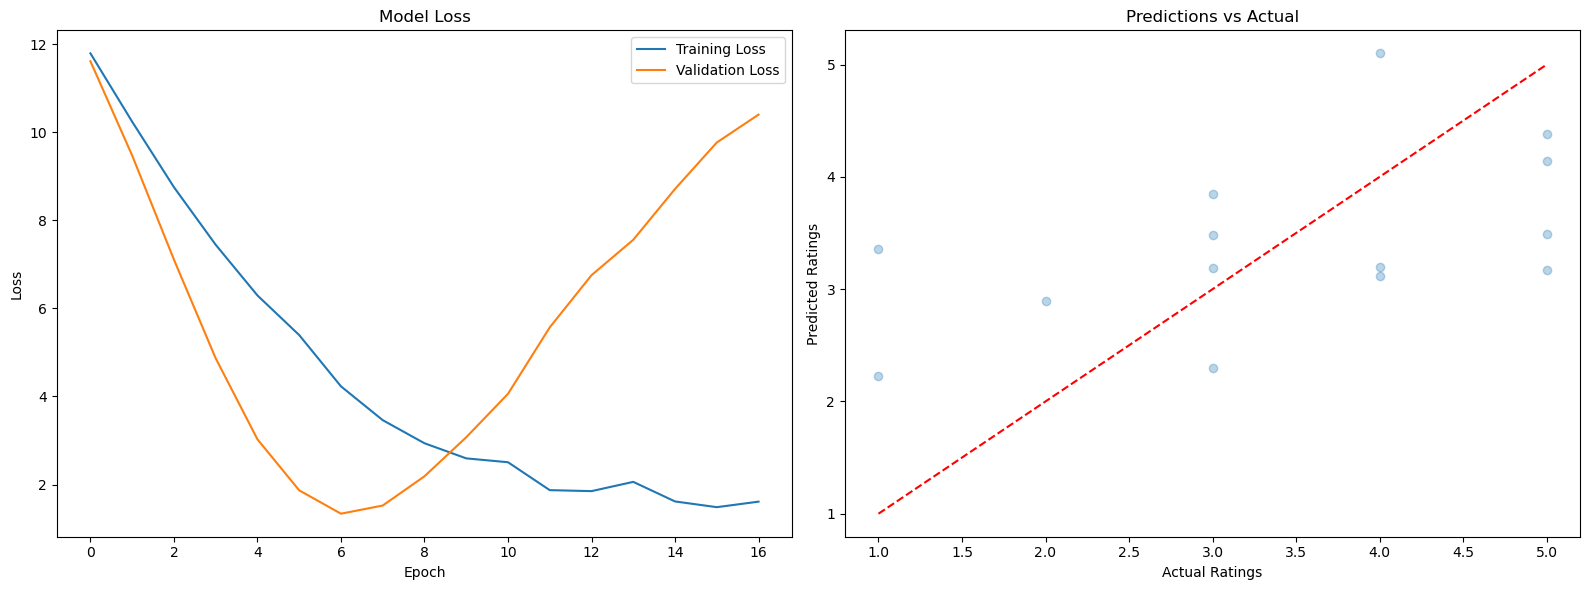

In [144]:
# Define and train the model with a simpler architecture
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Dropout, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

# Define input layers
user_input = Input(shape=(1,), name='user_input')
recipe_input = Input(shape=(1,), name='recipe_input')
features_input = Input(shape=(X_features_train.shape[1],), name='features_input')

# Simpler embedding layers
user_embedding = Embedding(input_dim=len(user_map), output_dim=64)(user_input)
user_embedding = Flatten()(user_embedding)

recipe_embedding = Embedding(input_dim=len(recipe_map), output_dim=64)(recipe_input)
recipe_embedding = Flatten()(recipe_embedding)

# Process features
features_processed = Dense(64, activation='relu')(features_input)
features_processed = Dropout(0.4)(features_processed)

# Combine
combined = Concatenate()([user_embedding, recipe_embedding, features_processed])

# Simpler network
x = Dense(64, activation='relu')(combined)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)

# Output layer
output = Dense(1, activation='linear')(x)

# Create and compile model
model = Model(
    inputs=[user_input, recipe_input, features_input],
    outputs=output
)

# Use much lower learning rate
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='mean_squared_error',
    metrics=['mae']
)

# Print model summary
model.summary()

# Define learning rate scheduler
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=0.0001,
    verbose=1
)

# Train with callbacks
history = model.fit(
    [X_user_train, X_recipe_train, X_features_train],
    y_train,
    validation_data=([X_user_test, X_recipe_test, X_features_test], y_test),
    epochs=30,  # Increase epochs to give more time to learn
    batch_size=32,  # Smaller batch size for better generalization
    callbacks=[
        EarlyStopping(
            monitor='val_loss',
            patience=10,  # More patience
            restore_best_weights=True,
            verbose=1
        ),
        lr_scheduler
    ]
)

# Evaluate on test set
test_loss, test_mae = model.evaluate(
    [X_user_test, X_recipe_test, X_features_test],
    y_test,
    verbose=1
)
print(f"Test Mean Absolute Error: {test_mae:.4f}")

# Make predictions
predictions = model.predict([X_user_test, X_recipe_test, X_features_test])

# Calculate additional metrics
from sklearn.metrics import mean_squared_error, r2_score

# Ensure predictions is the right shape
predictions = predictions.flatten()

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse:.4f}")

# R-squared
r2 = r2_score(y_test, predictions)
print(f"R²: {r2:.4f}")

# Plot results
plt.figure(figsize=(16, 6))

# Plot training history
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot predictions vs actual
plt.subplot(1, 2, 2)
plt.scatter(y_test, predictions, alpha=0.3)
plt.plot([1, 5], [1, 5], 'r--')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Predictions vs Actual')
plt.tight_layout()
plt.show()

Training models:   0%|                                   | 0/10 [00:00<?, ?it/s]


Training model 1 of 10
Parameters: {'embedding_dim': 16, 'units1': 64, 'dropout1': 0.4, 'units2': 64, 'dropout2': 0.2, 'learning_rate': 0.0001, 'batch_size': 32}


Training models:  10%|██▋                        | 1/10 [00:01<00:11,  1.23s/it]


Training model 2 of 10
Parameters: {'embedding_dim': 16, 'units1': 256, 'dropout1': 0.4, 'units2': 128, 'dropout2': 0.2, 'learning_rate': 0.001, 'batch_size': 64}


Training models:  20%|█████▍                     | 2/10 [00:02<00:08,  1.04s/it]


Training model 3 of 10
Parameters: {'embedding_dim': 16, 'units1': 64, 'dropout1': 0.2, 'units2': 32, 'dropout2': 0.2, 'learning_rate': 0.001, 'batch_size': 128}


Training models:  30%|████████                   | 3/10 [00:03<00:06,  1.03it/s]


Training model 4 of 10
Parameters: {'embedding_dim': 16, 'units1': 256, 'dropout1': 0.2, 'units2': 128, 'dropout2': 0.4, 'learning_rate': 0.001, 'batch_size': 128}


Training models:  40%|██████████▊                | 4/10 [00:03<00:05,  1.08it/s]


Training model 5 of 10
Parameters: {'embedding_dim': 64, 'units1': 64, 'dropout1': 0.3, 'units2': 128, 'dropout2': 0.3, 'learning_rate': 0.0001, 'batch_size': 32}


Training models:  50%|█████████████▌             | 5/10 [00:05<00:05,  1.15s/it]


Training model 6 of 10
Parameters: {'embedding_dim': 64, 'units1': 128, 'dropout1': 0.3, 'units2': 32, 'dropout2': 0.2, 'learning_rate': 0.0005, 'batch_size': 32}


Training models:  60%|████████████████▏          | 6/10 [00:06<00:04,  1.15s/it]


Training model 7 of 10
Parameters: {'embedding_dim': 16, 'units1': 128, 'dropout1': 0.2, 'units2': 64, 'dropout2': 0.3, 'learning_rate': 0.001, 'batch_size': 64}


Training models:  70%|██████████████████▉        | 7/10 [00:07<00:03,  1.07s/it]


Training model 8 of 10
Parameters: {'embedding_dim': 16, 'units1': 256, 'dropout1': 0.3, 'units2': 128, 'dropout2': 0.2, 'learning_rate': 0.0005, 'batch_size': 32}


Training models:  80%|█████████████████████▌     | 8/10 [00:08<00:02,  1.06s/it]


Training model 9 of 10
Parameters: {'embedding_dim': 48, 'units1': 256, 'dropout1': 0.4, 'units2': 64, 'dropout2': 0.4, 'learning_rate': 0.0001, 'batch_size': 128}


Training models:  90%|████████████████████████▎  | 9/10 [00:09<00:01,  1.08s/it]


Training model 10 of 10
Parameters: {'embedding_dim': 16, 'units1': 64, 'dropout1': 0.4, 'units2': 32, 'dropout2': 0.3, 'learning_rate': 0.0001, 'batch_size': 32}


Training models: 100%|██████████████████████████| 10/10 [00:10<00:00,  1.09s/it]



Best validation MSE: 1.1311408281326294
Best validation MAE: 0.9488430023193359
Best parameters:
  embedding_dim: 16
  units1: 64
  dropout1: 0.2
  units2: 32
  dropout2: 0.2
  learning_rate: 0.001
  batch_size: 128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Test Set Metrics for Best Model:
Mean Absolute Error: 0.9488
Mean Squared Error: 1.1311
Root Mean Squared Error: 1.0636
R-squared: 0.3772


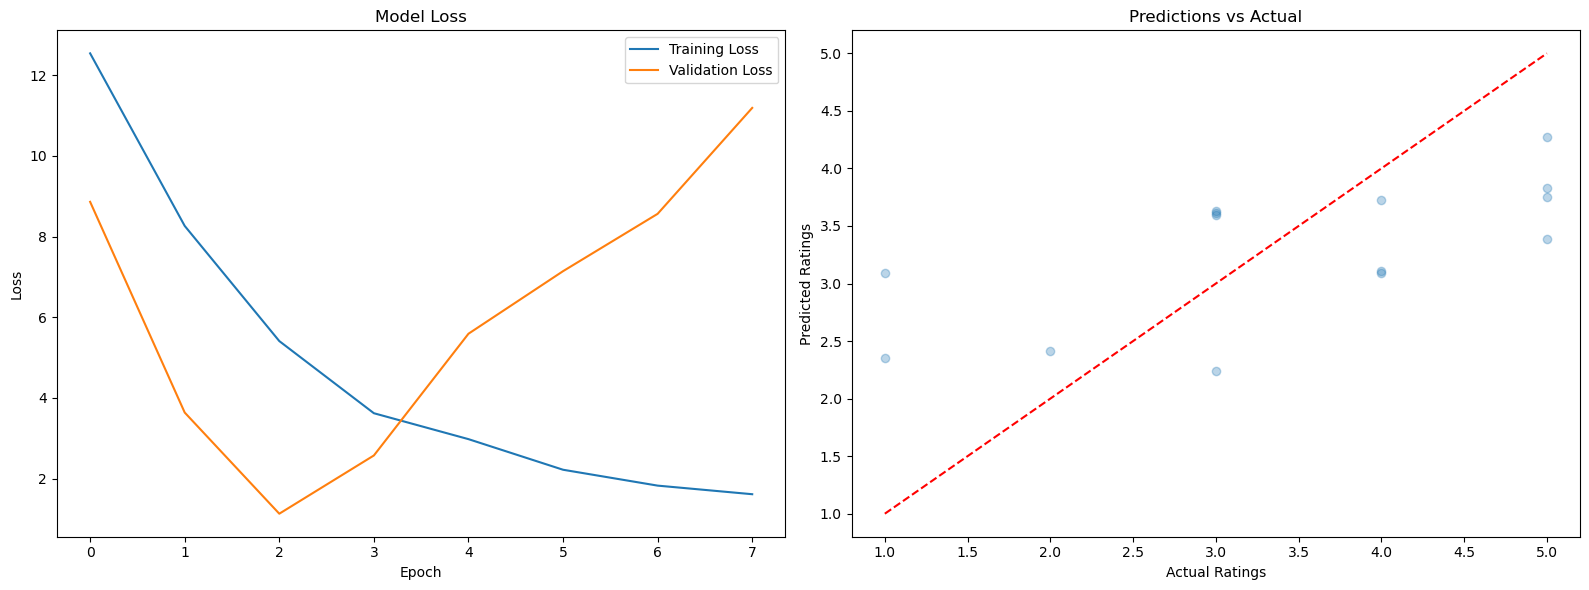

In [145]:
# uses random grid search, also finds best combination of hyperparameters

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Dropout, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

# Define hyperparameter grid
param_grid = {
    'embedding_dim': [16, 32, 48, 64],
    'units1': [64, 128, 256],
    'dropout1': [0.2, 0.3, 0.4],
    'units2': [32, 64, 128],
    'dropout2': [0.2, 0.3, 0.4],
    'learning_rate': [0.0001, 0.0005, 0.001],
    'batch_size': [32, 64, 128]
}

# Function to create model with specific parameters
def create_model(params, user_map, recipe_map, X_features_shape):
    # Define input layers
    user_input = Input(shape=(1,), name='user_input')
    recipe_input = Input(shape=(1,), name='recipe_input')
    features_input = Input(shape=(X_features_shape,), name='features_input')
    
    # Embedding layers
    user_embedding = Embedding(input_dim=len(user_map), 
                              output_dim=params['embedding_dim'])(user_input)
    user_embedding = Flatten()(user_embedding)
    
    recipe_embedding = Embedding(input_dim=len(recipe_map), 
                                output_dim=params['embedding_dim'])(recipe_input)
    recipe_embedding = Flatten()(recipe_embedding)
    
    # Process features
    features_processed = Dense(params['units1'], activation='relu')(features_input)
    features_processed = Dropout(params['dropout1'])(features_processed)
    
    # Combine all features
    combined = Concatenate()([user_embedding, recipe_embedding, features_processed])
    
    # Hidden layers
    x = Dense(params['units1'], activation='relu')(combined)
    x = Dropout(params['dropout1'])(x)
    x = Dense(params['units2'], activation='relu')(x)
    x = Dropout(params['dropout2'])(x)
    
    # Output layer
    output = Dense(1, activation='linear')(x)
    
    # Create model
    model = Model(
        inputs=[user_input, recipe_input, features_input],
        outputs=output
    )
    
    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=params['learning_rate']),
        loss='mean_squared_error',
        metrics=['mae', 'mse']
    )
    
    return model

# Function to train and evaluate model
def train_evaluate_model(params, X_user_train, X_recipe_train, X_features_train, y_train,
                        X_user_test, X_recipe_test, X_features_test, y_test,
                        user_map, recipe_map):
    try:
        # Create model
        model = create_model(params, user_map, recipe_map, X_features_train.shape[1])
        
        # Callbacks
        callbacks = [
            EarlyStopping(
                monitor='val_loss',
                patience=5,
                restore_best_weights=True,
                verbose=0
            )
        ]
        
        # Train model
        history = model.fit(
            [X_user_train, X_recipe_train, X_features_train],
            y_train,
            validation_data=([X_user_test, X_recipe_test, X_features_test], y_test),
            epochs=10,  # Limit for random search
            batch_size=params['batch_size'],
            callbacks=callbacks,
            verbose=0
        )
        
        # Get validation metrics
        val_mse = min(history.history['val_loss'])
        val_mae = min(history.history['val_mae'])
        
        return {
            'model': model, 
            'val_mse': val_mse,
            'val_mae': val_mae,
            'params': params,
            'history': history
        }
    
    except Exception as e:
        print(f"Error with parameters {params}: {str(e)}")
        return {
            'model': None, 
            'val_mse': float('inf'),
            'val_mae': float('inf'), 
            'params': params,
            'history': None
        }

# Function to perform random grid search
def random_grid_search(param_grid, n_iter, X_user_train, X_recipe_train, X_features_train, y_train,
                      X_user_test, X_recipe_test, X_features_test, y_test,
                      user_map, recipe_map):
    # Generate n_iter random parameter combinations
    param_combinations = []
    for _ in range(n_iter):
        params = {k: random.choice(v) for k, v in param_grid.items()}
        param_combinations.append(params)
    
    # Train and evaluate models
    results = []
    for i, params in enumerate(tqdm(param_combinations, desc="Training models")):
        print(f"\nTraining model {i+1} of {n_iter}")
        print(f"Parameters: {params}")
        
        result = train_evaluate_model(
            params, X_user_train, X_recipe_train, X_features_train, y_train,
            X_user_test, X_recipe_test, X_features_test, y_test,
            user_map, recipe_map
        )
        
        results.append(result)
    
    # Find best model
    best_result = min(results, key=lambda x: x['val_mse'])
    
    return results, best_result

# Main execution
def main():
    # Assuming these variables are already defined in your environment:
    # X_user_train, X_recipe_train, X_features_train, y_train
    # X_user_test, X_recipe_test, X_features_test, y_test
    # user_map, recipe_map
    
    # Set random seed for reproducibility
    np.random.seed(42)
    tf.random.set_seed(42)
    random.seed(42)
    
    # Perform random grid search
    n_iter = 10  # Number of random combinations to try
    results, best_result = random_grid_search(
        param_grid, n_iter, 
        X_user_train, X_recipe_train, X_features_train, y_train,
        X_user_test, X_recipe_test, X_features_test, y_test,
        user_map, recipe_map
    )
    
    # Print best parameters
    print("\n\nBest validation MSE:", best_result['val_mse'])
    print("Best validation MAE:", best_result['val_mae'])
    print("Best parameters:")
    for param, value in best_result['params'].items():
        print(f"  {param}: {value}")
    
    # Evaluate best model on test set
    best_model = best_result['model']
    if best_model is not None:
        # Make predictions
        predictions = best_model.predict(
            [X_user_test, X_recipe_test, X_features_test]
        )
        
        # Ensure predictions is the right shape
        predictions = predictions.flatten()
        
        # Calculate metrics
        mae = np.mean(np.abs(y_test - predictions))
        mse = np.mean((y_test - predictions)**2)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, predictions)
        
        # Print metrics
        print("\nTest Set Metrics for Best Model:")
        print(f"Mean Absolute Error: {mae:.4f}")
        print(f"Mean Squared Error: {mse:.4f}")
        print(f"Root Mean Squared Error: {rmse:.4f}")
        print(f"R-squared: {r2:.4f}")
        
        # Plot results
        plt.figure(figsize=(16, 6))
        
        # Plot training history
        plt.subplot(1, 2, 1)
        plt.plot(best_result['history'].history['loss'], label='Training Loss')
        plt.plot(best_result['history'].history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        
        # Plot predictions vs actual
        plt.subplot(1, 2, 2)
        plt.scatter(y_test, predictions, alpha=0.3)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
        plt.xlabel('Actual Ratings')
        plt.ylabel('Predicted Ratings')
        plt.title('Predictions vs Actual')
        plt.tight_layout()
        plt.show()
        
        # Return best model for further use if needed
        return best_model, best_result['params']

if __name__ == "__main__":
    main()

In [93]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Dropout, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

# Define hyperparameter grid
param_grid = {
    'embedding_dim': [16, 32, 48, 64],
    'units1': [64, 128, 256],
    'dropout1': [0.2, 0.3, 0.4],
    'units2': [32, 64, 128],
    'dropout2': [0.2, 0.3, 0.4],
    'learning_rate': [0.0001, 0.0005, 0.001],
    'batch_size': [32, 64, 128]
}

# Function to create model with specific parameters
def create_model(params, user_map, recipe_map, X_features_shape):
    # Define input layers
    user_input = Input(shape=(1,), name='user_input')
    recipe_input = Input(shape=(1,), name='recipe_input')
    features_input = Input(shape=(X_features_shape,), name='features_input')
    
    # Embedding layers
    user_embedding = Embedding(input_dim=len(user_map), 
                              output_dim=params['embedding_dim'])(user_input)
    user_embedding = Flatten()(user_embedding)
    
    recipe_embedding = Embedding(input_dim=len(recipe_map), 
                                output_dim=params['embedding_dim'])(recipe_input)
    recipe_embedding = Flatten()(recipe_embedding)
    
    # Process features
    features_processed = Dense(params['units1'], activation='relu')(features_input)
    features_processed = Dropout(params['dropout1'])(features_processed)
    
    # Combine all features
    combined = Concatenate()([user_embedding, recipe_embedding, features_processed])
    
    # Hidden layers
    x = Dense(params['units1'], activation='relu')(combined)
    x = Dropout(params['dropout1'])(x)
    x = Dense(params['units2'], activation='relu')(x)
    x = Dropout(params['dropout2'])(x)
    
    # Output layer
    output = Dense(1, activation='linear')(x)
    
    # Create model
    model = Model(
        inputs=[user_input, recipe_input, features_input],
        outputs=output
    )
    
    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=params['learning_rate']),
        loss='mean_squared_error',
        metrics=['mae']
    )
    
    return model

# Function to train and evaluate model
def train_evaluate_model(params, X_user_train, X_recipe_train, X_features_train, y_train,
                        X_user_test, X_recipe_test, X_features_test, y_test,
                        user_map, recipe_map):
    try:
        # Create model
        model = create_model(params, user_map, recipe_map, X_features_train.shape[1])
        
        # Callbacks
        callbacks = [
            EarlyStopping(
                monitor='val_loss',
                patience=5,
                restore_best_weights=True,
                verbose=0
            )
        ]
        
        # Train model
        history = model.fit(
            [X_user_train, X_recipe_train, X_features_train],
            y_train,
            validation_data=([X_user_test, X_recipe_test, X_features_test], y_test),
            epochs=10,  # Limit for random search
            batch_size=params['batch_size'],
            callbacks=callbacks,
            verbose=0
        )
        
        # Get validation metrics
        val_mae = min(history.history['val_mae'])
        
        return {
            'model': model, 
            'val_mae': val_mae, 
            'params': params,
            'history': history
        }
    
    except Exception as e:
        print(f"Error with parameters {params}: {str(e)}")
        return {
            'model': None, 
            'val_mae': float('inf'),
            'val_mse': float('inf'),
            'params': params,
            'history': None
        }

# Function to perform random grid search
def random_grid_search(param_grid, n_iter, X_user_train, X_recipe_train, X_features_train, y_train,
                      X_user_test, X_recipe_test, X_features_test, y_test,
                      user_map, recipe_map):
    # Generate n_iter random parameter combinations
    param_combinations = []
    for _ in range(n_iter):
        params = {k: random.choice(v) for k, v in param_grid.items()}
        param_combinations.append(params)
    
    # Train and evaluate models
    results = []
    for i, params in enumerate(tqdm(param_combinations, desc="Training models")):
        print(f"\nTraining model {i+1} of {n_iter}")
        print(f"Parameters: {params}")
        
        result = train_evaluate_model(
            params, X_user_train, X_recipe_train, X_features_train, y_train,
            X_user_test, X_recipe_test, X_features_test, y_test,
            user_map, recipe_map
        )
        
        results.append(result)
    
    # Find best model
    best_result = min(results, key=lambda x: x['val_mae'])
    
    return results, best_result

# Main execution
def main():
    # Assuming these variables are already defined in your environment:
    # X_user_train, X_recipe_train, X_features_train, y_train
    # X_user_test, X_recipe_test, X_features_test, y_test
    # user_map, recipe_map
    
    # Set random seed for reproducibility
    np.random.seed(42)
    tf.random.set_seed(42)
    random.seed(42)
    
    # Perform random grid search
    n_iter = 10  # Number of random combinations to try
    results, best_result = random_grid_search(
        param_grid, n_iter, 
        X_user_train, X_recipe_train, X_features_train, y_train,
        X_user_test, X_recipe_test, X_features_test, y_test,
        user_map, recipe_map
    )
    
    # Print best parameters
    print("\n\nBest validation MSE:", best_result['val_mse'])
    print("Best validation MAE:", best_result['val_mae'])
    print("Best parameters:")
    for param, value in best_result['params'].items():
        print(f"  {param}: {value}")
    
    # Evaluate best model on test set
    best_model = best_result['model']
    if best_model is not None:
        # Make predictions
        predictions = best_model.predict(
            [X_user_test, X_recipe_test, X_features_test]
        )
        
        # Ensure predictions is the right shape
        predictions = predictions.flatten()
        
        # Calculate metrics
        mae = np.mean(np.abs(y_test - predictions))
        mse = np.mean((y_test - predictions)**2)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, predictions)
        
        # Print metrics
        print("\nTest Set Metrics for Best Model:")
        print(f"Mean Absolute Error: {mae:.4f}")
        print(f"Mean Squared Error: {mse:.4f}")
        print(f"Root Mean Squared Error: {rmse:.4f}")
        print(f"R-squared: {r2:.4f}")
        
        # Plot results
        plt.figure(figsize=(16, 6))
        
        # Plot training history
        plt.subplot(1, 2, 1)
        plt.plot(best_result['history'].history['loss'], label='Training Loss')
        plt.plot(best_result['history'].history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        
        # Plot predictions vs actual
        plt.subplot(1, 2, 2)
        plt.scatter(y_test, predictions, alpha=0.3)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
        plt.xlabel('Actual Ratings')
        plt.ylabel('Predicted Ratings')
        plt.title('Predictions vs Actual')
        plt.tight_layout()
        plt.show()
        
        # Return best model for further use if needed
        return best_model, best_result['params']

if __name__ == "__main__":
    main()

Training models:   0%|                                   | 0/10 [00:00<?, ?it/s]


Training model 1 of 10
Parameters: {'embedding_dim': 16, 'units1': 64, 'dropout1': 0.4, 'units2': 64, 'dropout2': 0.2, 'learning_rate': 0.0001, 'batch_size': 32}


Training models:  10%|██▋                        | 1/10 [00:01<00:10,  1.17s/it]


Training model 2 of 10
Parameters: {'embedding_dim': 16, 'units1': 256, 'dropout1': 0.4, 'units2': 128, 'dropout2': 0.2, 'learning_rate': 0.001, 'batch_size': 64}


Training models:  20%|█████▍                     | 2/10 [00:01<00:07,  1.03it/s]


Training model 3 of 10
Parameters: {'embedding_dim': 16, 'units1': 64, 'dropout1': 0.2, 'units2': 32, 'dropout2': 0.2, 'learning_rate': 0.001, 'batch_size': 128}


Training models:  30%|████████                   | 3/10 [00:02<00:06,  1.13it/s]


Training model 4 of 10
Parameters: {'embedding_dim': 16, 'units1': 256, 'dropout1': 0.2, 'units2': 128, 'dropout2': 0.4, 'learning_rate': 0.001, 'batch_size': 128}


Training models:  40%|██████████▊                | 4/10 [00:03<00:05,  1.19it/s]


Training model 5 of 10
Parameters: {'embedding_dim': 64, 'units1': 64, 'dropout1': 0.3, 'units2': 128, 'dropout2': 0.3, 'learning_rate': 0.0001, 'batch_size': 32}


Training models:  50%|█████████████▌             | 5/10 [00:04<00:05,  1.05s/it]


Training model 6 of 10
Parameters: {'embedding_dim': 64, 'units1': 128, 'dropout1': 0.3, 'units2': 32, 'dropout2': 0.2, 'learning_rate': 0.0005, 'batch_size': 32}


Training models:  60%|████████████████▏          | 6/10 [00:06<00:04,  1.05s/it]


Training model 7 of 10
Parameters: {'embedding_dim': 16, 'units1': 128, 'dropout1': 0.2, 'units2': 64, 'dropout2': 0.3, 'learning_rate': 0.001, 'batch_size': 64}


Training models:  70%|██████████████████▉        | 7/10 [00:06<00:02,  1.04it/s]


Training model 8 of 10
Parameters: {'embedding_dim': 16, 'units1': 256, 'dropout1': 0.3, 'units2': 128, 'dropout2': 0.2, 'learning_rate': 0.0005, 'batch_size': 32}


Training models:  80%|█████████████████████▌     | 8/10 [00:08<00:02,  1.29s/it]


Training model 9 of 10
Parameters: {'embedding_dim': 48, 'units1': 256, 'dropout1': 0.4, 'units2': 64, 'dropout2': 0.4, 'learning_rate': 0.0001, 'batch_size': 128}


Training models:  90%|████████████████████████▎  | 9/10 [00:09<00:01,  1.19s/it]


Training model 10 of 10
Parameters: {'embedding_dim': 16, 'units1': 64, 'dropout1': 0.4, 'units2': 32, 'dropout2': 0.3, 'learning_rate': 0.0001, 'batch_size': 32}


Training models: 100%|██████████████████████████| 10/10 [00:10<00:00,  1.08s/it]


KeyError: 'val_mse'

### Final model 

Training models:   0%|                                   | 0/10 [00:00<?, ?it/s]


Training model 1 of 10
Parameters: {'embedding_dim': 16, 'units1': 64, 'dropout1': 0.4, 'units2': 64, 'dropout2': 0.2, 'learning_rate': 0.0001, 'batch_size': 32}


Training models:  10%|██▋                        | 1/10 [00:01<00:11,  1.33s/it]


Training model 2 of 10
Parameters: {'embedding_dim': 16, 'units1': 256, 'dropout1': 0.4, 'units2': 128, 'dropout2': 0.2, 'learning_rate': 0.001, 'batch_size': 64}


Training models:  20%|█████▍                     | 2/10 [00:02<00:08,  1.08s/it]


Training model 3 of 10
Parameters: {'embedding_dim': 16, 'units1': 64, 'dropout1': 0.2, 'units2': 32, 'dropout2': 0.2, 'learning_rate': 0.001, 'batch_size': 128}


Training models:  30%|████████                   | 3/10 [00:03<00:06,  1.01it/s]


Training model 4 of 10
Parameters: {'embedding_dim': 16, 'units1': 256, 'dropout1': 0.2, 'units2': 128, 'dropout2': 0.4, 'learning_rate': 0.001, 'batch_size': 128}


Training models:  40%|██████████▊                | 4/10 [00:03<00:05,  1.07it/s]


Training model 5 of 10
Parameters: {'embedding_dim': 64, 'units1': 64, 'dropout1': 0.3, 'units2': 128, 'dropout2': 0.3, 'learning_rate': 0.0001, 'batch_size': 32}


Training models:  50%|█████████████▌             | 5/10 [00:05<00:05,  1.18s/it]


Training model 6 of 10
Parameters: {'embedding_dim': 64, 'units1': 128, 'dropout1': 0.3, 'units2': 32, 'dropout2': 0.2, 'learning_rate': 0.0005, 'batch_size': 32}


Training models:  60%|████████████████▏          | 6/10 [00:06<00:04,  1.19s/it]


Training model 7 of 10
Parameters: {'embedding_dim': 16, 'units1': 128, 'dropout1': 0.2, 'units2': 64, 'dropout2': 0.3, 'learning_rate': 0.001, 'batch_size': 64}


Training models:  70%|██████████████████▉        | 7/10 [00:07<00:03,  1.11s/it]


Training model 8 of 10
Parameters: {'embedding_dim': 16, 'units1': 256, 'dropout1': 0.3, 'units2': 128, 'dropout2': 0.2, 'learning_rate': 0.0005, 'batch_size': 32}


Training models:  80%|█████████████████████▌     | 8/10 [00:08<00:02,  1.11s/it]


Training model 9 of 10
Parameters: {'embedding_dim': 48, 'units1': 256, 'dropout1': 0.4, 'units2': 64, 'dropout2': 0.4, 'learning_rate': 0.0001, 'batch_size': 128}


Training models:  90%|████████████████████████▎  | 9/10 [00:09<00:01,  1.10s/it]


Training model 10 of 10
Parameters: {'embedding_dim': 16, 'units1': 64, 'dropout1': 0.4, 'units2': 32, 'dropout2': 0.3, 'learning_rate': 0.0001, 'batch_size': 32}


Training models: 100%|██████████████████████████| 10/10 [00:11<00:00,  1.11s/it]



Best validation MSE: 1.1311408281326294
Best validation MAE: 0.9488430023193359
Best parameters:
  embedding_dim: 16
  units1: 64
  dropout1: 0.2
  units2: 32
  dropout2: 0.2
  learning_rate: 0.001
  batch_size: 128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step



Test Set Metrics for Best Single Model:
Mean Absolute Error: 0.9488
Mean Squared Error: 1.1311
Root Mean Squared Error: 1.0636
R-squared: 0.3772


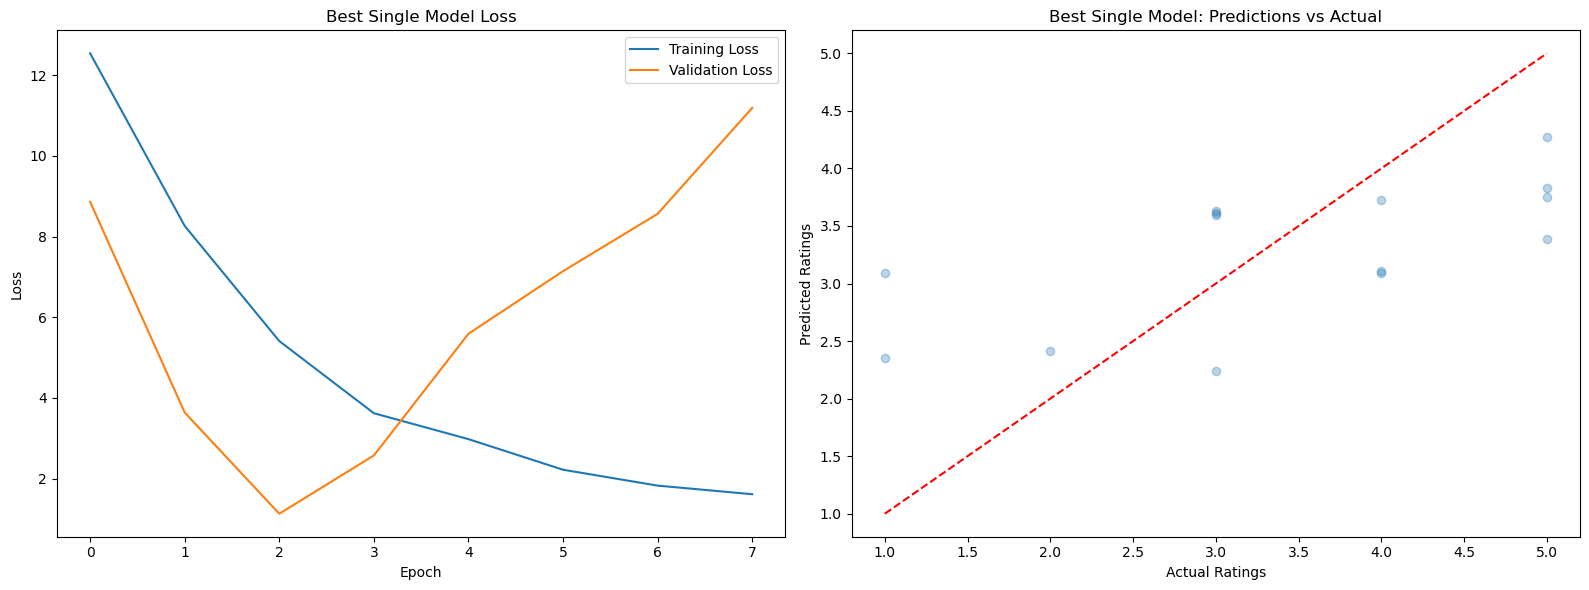



Evaluating simple ensemble model (top 3 models):

Creating ensemble from top 3 models:
Model 1 validation MSE: 1.1311408281326294
  embedding_dim: 16
  units1: 64
  dropout1: 0.2
  units2: 32
  dropout2: 0.2
  learning_rate: 0.001
  batch_size: 128
Model 2 validation MSE: 1.1628005504608154
  embedding_dim: 16
  units1: 64
  dropout1: 0.4
  units2: 64
  dropout2: 0.2
  learning_rate: 0.0001
  batch_size: 32
Model 3 validation MSE: 1.1823756694793701
  embedding_dim: 16
  units1: 64
  dropout1: 0.4
  units2: 32
  dropout2: 0.3
  learning_rate: 0.0001
  batch_size: 32
Added predictions with shape (14, 1)
Added predictions with shape (14, 1)
Added predictions with shape (14, 1)

Simple Ensemble Model Metrics:
Mean Absolute Error: 0.8570
Mean Squared Error: 1.0104
Root Mean Squared Error: 1.0052
R-squared: 0.4437


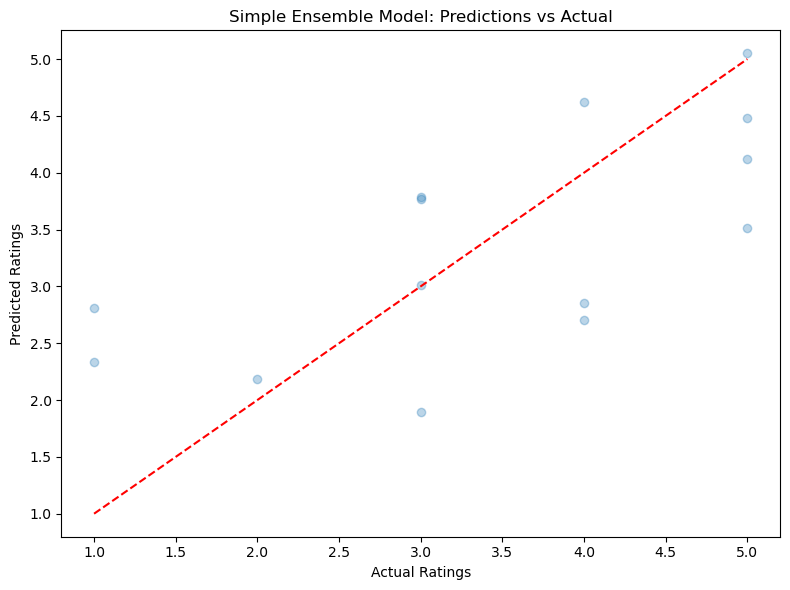



Evaluating weighted ensemble model (top 5 models):

Creating weighted ensemble from top 5 models:
Model 1 validation MSE: 1.1311408281326294
Model 2 validation MSE: 1.1628005504608154
Model 3 validation MSE: 1.1823756694793701
Model 4 validation MSE: 1.3016711473464966
Model 5 validation MSE: 1.4101840257644653
Model weights in ensemble:
  Model 1 weight: 0.2174
  Model 2 weight: 0.2114
  Model 3 weight: 0.2079
  Model 4 weight: 0.1889
  Model 5 weight: 0.1744

Weighted Ensemble Model Metrics:
Mean Absolute Error: 0.8880
Mean Squared Error: 1.0516
Root Mean Squared Error: 1.0255
R-squared: 0.4210


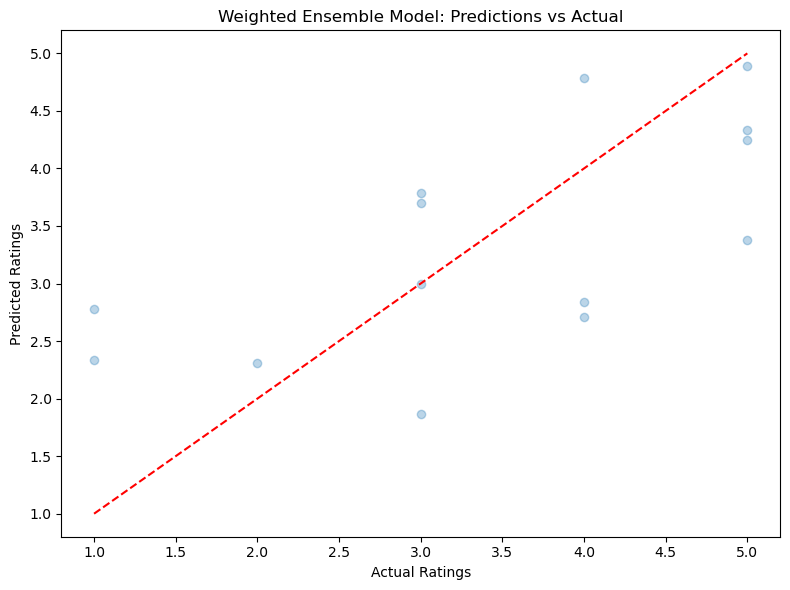

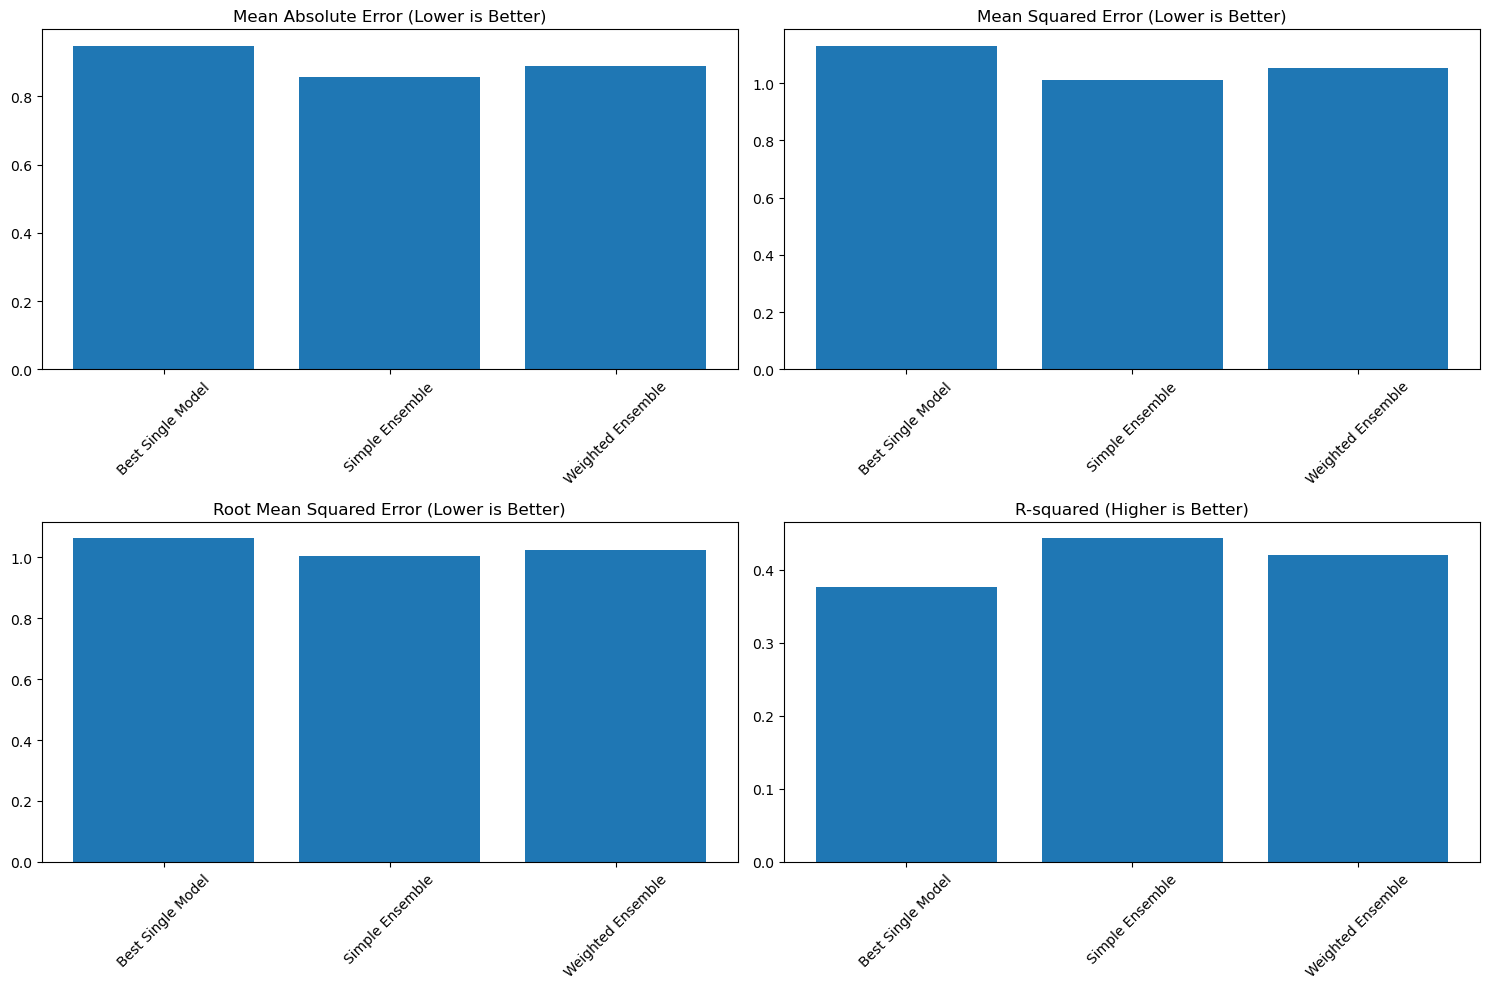

In [146]:
# uses random grid search, also finds best combination of hyperparameters
# and implements ensemble method

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Dropout, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

# Define hyperparameter grid
param_grid = {
    'embedding_dim': [16, 32, 48, 64],
    'units1': [64, 128, 256],
    'dropout1': [0.2, 0.3, 0.4],
    'units2': [32, 64, 128],
    'dropout2': [0.2, 0.3, 0.4],
    'learning_rate': [0.0001, 0.0005, 0.001],
    'batch_size': [32, 64, 128]
}

# Function to create model with specific parameters
def create_model(params, user_map, recipe_map, X_features_shape):
    # Define input layers
    user_input = Input(shape=(1,), name='user_input')
    recipe_input = Input(shape=(1,), name='recipe_input')
    features_input = Input(shape=(X_features_shape,), name='features_input')
    
    # Embedding layers
    user_embedding = Embedding(input_dim=len(user_map), 
                              output_dim=params['embedding_dim'])(user_input)
    user_embedding = Flatten()(user_embedding)
    
    recipe_embedding = Embedding(input_dim=len(recipe_map), 
                                output_dim=params['embedding_dim'])(recipe_input)
    recipe_embedding = Flatten()(recipe_embedding)
    
    # Process features
    features_processed = Dense(params['units1'], activation='relu')(features_input)
    features_processed = Dropout(params['dropout1'])(features_processed)
    
    # Combine all features
    combined = Concatenate()([user_embedding, recipe_embedding, features_processed])
    
    # Hidden layers
    x = Dense(params['units1'], activation='relu')(combined)
    x = Dropout(params['dropout1'])(x)
    x = Dense(params['units2'], activation='relu')(x)
    x = Dropout(params['dropout2'])(x)
    
    # Output layer
    output = Dense(1, activation='linear')(x)
    
    # Create model
    model = Model(
        inputs=[user_input, recipe_input, features_input],
        outputs=output
    )
    
    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=params['learning_rate']),
        loss='mean_squared_error',
        metrics=['mae', 'mse']
    )
    
    return model

# Function to train and evaluate model
def train_evaluate_model(params, X_user_train, X_recipe_train, X_features_train, y_train,
                        X_user_test, X_recipe_test, X_features_test, y_test,
                        user_map, recipe_map):
    try:
        # Create model
        model = create_model(params, user_map, recipe_map, X_features_train.shape[1])
        
        # Callbacks
        callbacks = [
            EarlyStopping(
                monitor='val_loss',
                patience=5,
                restore_best_weights=True,
                verbose=0
            )
        ]
        
        # Train model
        history = model.fit(
            [X_user_train, X_recipe_train, X_features_train],
            y_train,
            validation_data=([X_user_test, X_recipe_test, X_features_test], y_test),
            epochs=10,  # Limit for random search
            batch_size=params['batch_size'],
            callbacks=callbacks,
            verbose=0
        )
        
        # Get validation metrics
        val_mse = min(history.history['val_loss'])
        val_mae = min(history.history['val_mae'])
        
        return {
            'model': model, 
            'val_mse': val_mse,
            'val_mae': val_mae,
            'params': params,
            'history': history
        }
    
    except Exception as e:
        print(f"Error with parameters {params}: {str(e)}")
        return {
            'model': None, 
            'val_mse': float('inf'),
            'val_mae': float('inf'), 
            'params': params,
            'history': None
        }

# Function to perform random grid search
def random_grid_search(param_grid, n_iter, X_user_train, X_recipe_train, X_features_train, y_train,
                      X_user_test, X_recipe_test, X_features_test, y_test,
                      user_map, recipe_map):
    # Generate n_iter random parameter combinations
    param_combinations = []
    for _ in range(n_iter):
        params = {k: random.choice(v) for k, v in param_grid.items()}
        param_combinations.append(params)
    
    # Train and evaluate models
    results = []
    for i, params in enumerate(tqdm(param_combinations, desc="Training models")):
        print(f"\nTraining model {i+1} of {n_iter}")
        print(f"Parameters: {params}")
        
        result = train_evaluate_model(
            params, X_user_train, X_recipe_train, X_features_train, y_train,
            X_user_test, X_recipe_test, X_features_test, y_test,
            user_map, recipe_map
        )
        
        results.append(result)
    
    # Find best model
    best_result = min(results, key=lambda x: x['val_mse'])
    
    return results, best_result

# Function to create ensemble predictions from multiple models
def create_ensemble(results, X_user_test, X_recipe_test, X_features_test, y_test, top_n=3):
    """
    Create an ensemble from the top N models based on validation MSE.
    
    Args:
        results: List of model results from random_grid_search
        X_user_test, X_recipe_test, X_features_test: Test inputs
        y_test: Test target values
        top_n: Number of top models to include in ensemble
    
    Returns:
        Ensemble predictions and metrics
    """
    # Sort results by validation MSE (lower is better)
    sorted_results = sorted(results, key=lambda x: x.get('val_mse', float('inf')))
    
    # Take the top N models
    top_models = sorted_results[:top_n]
    print(f"\nCreating ensemble from top {top_n} models:")
    for i, result in enumerate(top_models):
        print(f"Model {i+1} validation MSE: {result.get('val_mse', 'Not available')}")
        for param, value in result['params'].items():
            print(f"  {param}: {value}")
    
    # Make predictions with each model
    predictions_list = []
    for result in top_models:
        model = result['model']
        if model is not None:
            preds = model.predict([X_user_test, X_recipe_test, X_features_test], verbose=0)
            predictions_list.append(preds.flatten())
            print(f"Added predictions with shape {preds.shape}")
    
    # Check if we have any valid predictions
    if len(predictions_list) == 0:
        print("No valid models found for ensemble")
        return None
    
    # Combine predictions (simple average)
    ensemble_predictions = np.mean(predictions_list, axis=0)
    
    # Calculate metrics
    mae = np.mean(np.abs(y_test - ensemble_predictions))
    mse = np.mean((y_test - ensemble_predictions)**2)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, ensemble_predictions)
    
    return {
        'predictions': ensemble_predictions,
        'mae': mae,
        'mse': mse,
        'rmse': rmse,
        'r2': r2
    }

# Function to create a weighted ensemble based on validation performance
def create_weighted_ensemble(results, X_user_test, X_recipe_test, X_features_test, y_test, top_n=3):
    """
    Create a weighted ensemble from the top N models based on validation MSE.
    Models with lower validation MSE get higher weights.
    """
    # Sort results by validation MSE (lower is better)
    sorted_results = sorted(results, key=lambda x: x.get('val_mse', float('inf')))
    
    # Take the top N models
    top_models = sorted_results[:top_n]
    print(f"\nCreating weighted ensemble from top {top_n} models:")
    
    # Make predictions with each model
    predictions_list = []
    val_mse_list = []
    
    for i, result in enumerate(top_models):
        model = result['model']
        val_mse = result.get('val_mse', float('inf'))
        
        if model is not None and val_mse < float('inf'):
            preds = model.predict([X_user_test, X_recipe_test, X_features_test], verbose=0)
            predictions_list.append(preds.flatten())
            val_mse_list.append(val_mse)
            print(f"Model {i+1} validation MSE: {val_mse}")
    
    # Check if we have any valid predictions
    if len(predictions_list) == 0:
        print("No valid models found for ensemble")
        return None
    
    # Calculate weights (inverse of MSE)
    weights = [1.0/mse for mse in val_mse_list]
    normalized_weights = [w/sum(weights) for w in weights]
    
    print("Model weights in ensemble:")
    for i, w in enumerate(normalized_weights):
        print(f"  Model {i+1} weight: {w:.4f}")
    
    # Combine predictions with weights
    ensemble_predictions = np.zeros_like(predictions_list[0])
    for i, preds in enumerate(predictions_list):
        ensemble_predictions += normalized_weights[i] * preds
    
    # Calculate metrics
    mae = np.mean(np.abs(y_test - ensemble_predictions))
    mse = np.mean((y_test - ensemble_predictions)**2)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, ensemble_predictions)
    
    return {
        'predictions': ensemble_predictions,
        'mae': mae,
        'mse': mse,
        'rmse': rmse,
        'r2': r2
    }

# Main execution
def main():
    # Assuming these variables are already defined in your environment:
    # X_user_train, X_recipe_train, X_features_train, y_train
    # X_user_test, X_recipe_test, X_features_test, y_test
    # user_map, recipe_map
    
    # Set random seed for reproducibility
    np.random.seed(42)
    tf.random.set_seed(42)
    random.seed(42)
    
    # Perform random grid search
    n_iter = 10  # Number of random combinations to try
    results, best_result = random_grid_search(
        param_grid, n_iter, 
        X_user_train, X_recipe_train, X_features_train, y_train,
        X_user_test, X_recipe_test, X_features_test, y_test,
        user_map, recipe_map
    )
    
    # Print best parameters
    print("\n\nBest validation MSE:", best_result['val_mse'])
    print("Best validation MAE:", best_result['val_mae'])
    print("Best parameters:")
    for param, value in best_result['params'].items():
        print(f"  {param}: {value}")
    
    # Evaluate best model on test set
    best_model = best_result['model']
    if best_model is not None:
        # Make predictions
        predictions = best_model.predict(
            [X_user_test, X_recipe_test, X_features_test]
        )
        
        # Ensure predictions is the right shape
        predictions = predictions.flatten()
        
        # Calculate metrics
        mae = np.mean(np.abs(y_test - predictions))
        mse = np.mean((y_test - predictions)**2)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, predictions)
        
        # Print metrics
        print("\nTest Set Metrics for Best Single Model:")
        print(f"Mean Absolute Error: {mae:.4f}")
        print(f"Mean Squared Error: {mse:.4f}")
        print(f"Root Mean Squared Error: {rmse:.4f}")
        print(f"R-squared: {r2:.4f}")
        
        # Plot results
        plt.figure(figsize=(16, 6))
        
        # Plot training history
        plt.subplot(1, 2, 1)
        plt.plot(best_result['history'].history['loss'], label='Training Loss')
        plt.plot(best_result['history'].history['val_loss'], label='Validation Loss')
        plt.title('Best Single Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        
        # Plot predictions vs actual
        plt.subplot(1, 2, 2)
        plt.scatter(y_test, predictions, alpha=0.3)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
        plt.xlabel('Actual Ratings')
        plt.ylabel('Predicted Ratings')
        plt.title('Best Single Model: Predictions vs Actual')
        plt.tight_layout()
        plt.show()
    
    # Create simple ensemble
    print("\n\nEvaluating simple ensemble model (top 3 models):")
    ensemble_results = create_ensemble(
        results, 
        X_user_test, X_recipe_test, X_features_test, 
        y_test,
        top_n=3
    )
    
    if ensemble_results:
        # Print ensemble metrics
        print("\nSimple Ensemble Model Metrics:")
        print(f"Mean Absolute Error: {ensemble_results['mae']:.4f}")
        print(f"Mean Squared Error: {ensemble_results['mse']:.4f}")
        print(f"Root Mean Squared Error: {ensemble_results['rmse']:.4f}")
        print(f"R-squared: {ensemble_results['r2']:.4f}")
        
        # Plot ensemble results
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, ensemble_results['predictions'], alpha=0.3)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
        plt.xlabel('Actual Ratings')
        plt.ylabel('Predicted Ratings')
        plt.title('Simple Ensemble Model: Predictions vs Actual')
        plt.tight_layout()
        plt.show()
    
    # Create weighted ensemble
    print("\n\nEvaluating weighted ensemble model (top 5 models):")
    weighted_ensemble_results = create_weighted_ensemble(
        results, 
        X_user_test, X_recipe_test, X_features_test, 
        y_test,
        top_n=5
    )
    
    if weighted_ensemble_results:
        # Print weighted ensemble metrics
        print("\nWeighted Ensemble Model Metrics:")
        print(f"Mean Absolute Error: {weighted_ensemble_results['mae']:.4f}")
        print(f"Mean Squared Error: {weighted_ensemble_results['mse']:.4f}")
        print(f"Root Mean Squared Error: {weighted_ensemble_results['rmse']:.4f}")
        print(f"R-squared: {weighted_ensemble_results['r2']:.4f}")
        
        # Plot weighted ensemble results
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, weighted_ensemble_results['predictions'], alpha=0.3)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
        plt.xlabel('Actual Ratings')
        plt.ylabel('Predicted Ratings')
        plt.title('Weighted Ensemble Model: Predictions vs Actual')
        plt.tight_layout()
        plt.show()
        
        # Compare all methods
        methods = ['Best Single Model', 'Simple Ensemble', 'Weighted Ensemble']
        mae_values = [mae, ensemble_results['mae'], weighted_ensemble_results['mae']]
        mse_values = [mse, ensemble_results['mse'], weighted_ensemble_results['mse']]
        rmse_values = [rmse, ensemble_results['rmse'], weighted_ensemble_results['rmse']]
        r2_values = [r2, ensemble_results['r2'], weighted_ensemble_results['r2']]
        
        # Plot comparison
        plt.figure(figsize=(15, 10))
        
        plt.subplot(2, 2, 1)
        plt.bar(methods, mae_values)
        plt.title('Mean Absolute Error (Lower is Better)')
        plt.xticks(rotation=45)
        
        plt.subplot(2, 2, 2)
        plt.bar(methods, mse_values)
        plt.title('Mean Squared Error (Lower is Better)')
        plt.xticks(rotation=45)
        
        plt.subplot(2, 2, 3)
        plt.bar(methods, rmse_values)
        plt.title('Root Mean Squared Error (Lower is Better)')
        plt.xticks(rotation=45)
        
        plt.subplot(2, 2, 4)
        plt.bar(methods, r2_values)
        plt.title('R-squared (Higher is Better)')
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
    
    # Return results for further use if needed
    return {
        'best_single_model': {
            'model': best_model,
            'params': best_result['params'],
            'mae': mae,
            'mse': mse,
            'rmse': rmse,
            'r2': r2
        },
        'simple_ensemble': ensemble_results,
        'weighted_ensemble': weighted_ensemble_results
    }

if __name__ == "__main__":
    main()

Training models:   0%|                                   | 0/10 [00:00<?, ?it/s]


Training model 1 of 10
Parameters: {'embedding_dim': 16, 'units1': 64, 'dropout1': 0.4, 'units2': 64, 'dropout2': 0.2, 'learning_rate': 0.0001, 'batch_size': 32}


Training models:  10%|██▋                        | 1/10 [00:01<00:10,  1.14s/it]


Training model 2 of 10
Parameters: {'embedding_dim': 16, 'units1': 256, 'dropout1': 0.4, 'units2': 128, 'dropout2': 0.2, 'learning_rate': 0.001, 'batch_size': 64}


Training models:  20%|█████▍                     | 2/10 [00:02<00:07,  1.02it/s]


Training model 3 of 10
Parameters: {'embedding_dim': 16, 'units1': 64, 'dropout1': 0.2, 'units2': 32, 'dropout2': 0.2, 'learning_rate': 0.001, 'batch_size': 128}


Training models:  30%|████████                   | 3/10 [00:02<00:06,  1.12it/s]


Training model 4 of 10
Parameters: {'embedding_dim': 16, 'units1': 256, 'dropout1': 0.2, 'units2': 128, 'dropout2': 0.4, 'learning_rate': 0.001, 'batch_size': 128}


Training models:  40%|██████████▊                | 4/10 [00:03<00:05,  1.18it/s]


Training model 5 of 10
Parameters: {'embedding_dim': 64, 'units1': 64, 'dropout1': 0.3, 'units2': 128, 'dropout2': 0.3, 'learning_rate': 0.0001, 'batch_size': 32}


Training models:  50%|█████████████▌             | 5/10 [00:04<00:05,  1.05s/it]


Training model 6 of 10
Parameters: {'embedding_dim': 64, 'units1': 128, 'dropout1': 0.3, 'units2': 32, 'dropout2': 0.2, 'learning_rate': 0.0005, 'batch_size': 32}


Training models:  60%|████████████████▏          | 6/10 [00:06<00:04,  1.04s/it]


Training model 7 of 10
Parameters: {'embedding_dim': 16, 'units1': 128, 'dropout1': 0.2, 'units2': 64, 'dropout2': 0.3, 'learning_rate': 0.001, 'batch_size': 64}


Training models:  70%|██████████████████▉        | 7/10 [00:06<00:02,  1.05it/s]


Training model 8 of 10
Parameters: {'embedding_dim': 16, 'units1': 256, 'dropout1': 0.3, 'units2': 128, 'dropout2': 0.2, 'learning_rate': 0.0005, 'batch_size': 32}


Training models:  80%|█████████████████████▌     | 8/10 [00:07<00:01,  1.06it/s]


Training model 9 of 10
Parameters: {'embedding_dim': 48, 'units1': 256, 'dropout1': 0.4, 'units2': 64, 'dropout2': 0.4, 'learning_rate': 0.0001, 'batch_size': 128}


Training models:  90%|████████████████████████▎  | 9/10 [00:08<00:00,  1.04it/s]


Training model 10 of 10
Parameters: {'embedding_dim': 16, 'units1': 64, 'dropout1': 0.4, 'units2': 32, 'dropout2': 0.3, 'learning_rate': 0.0001, 'batch_size': 32}


Training models: 100%|██████████████████████████| 10/10 [00:09<00:00,  1.02it/s]



Best validation MAE: 1.0697588920593262
Best parameters:
  embedding_dim: 16
  units1: 64
  dropout1: 0.4
  units2: 64
  dropout2: 0.2
  learning_rate: 0.0001
  batch_size: 32
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

Test Set Metrics for Best Model:
Mean Absolute Error: 1.0698
Mean Squared Error: 1.5545
Root Mean Squared Error: 1.2468
R-squared: 0.3330


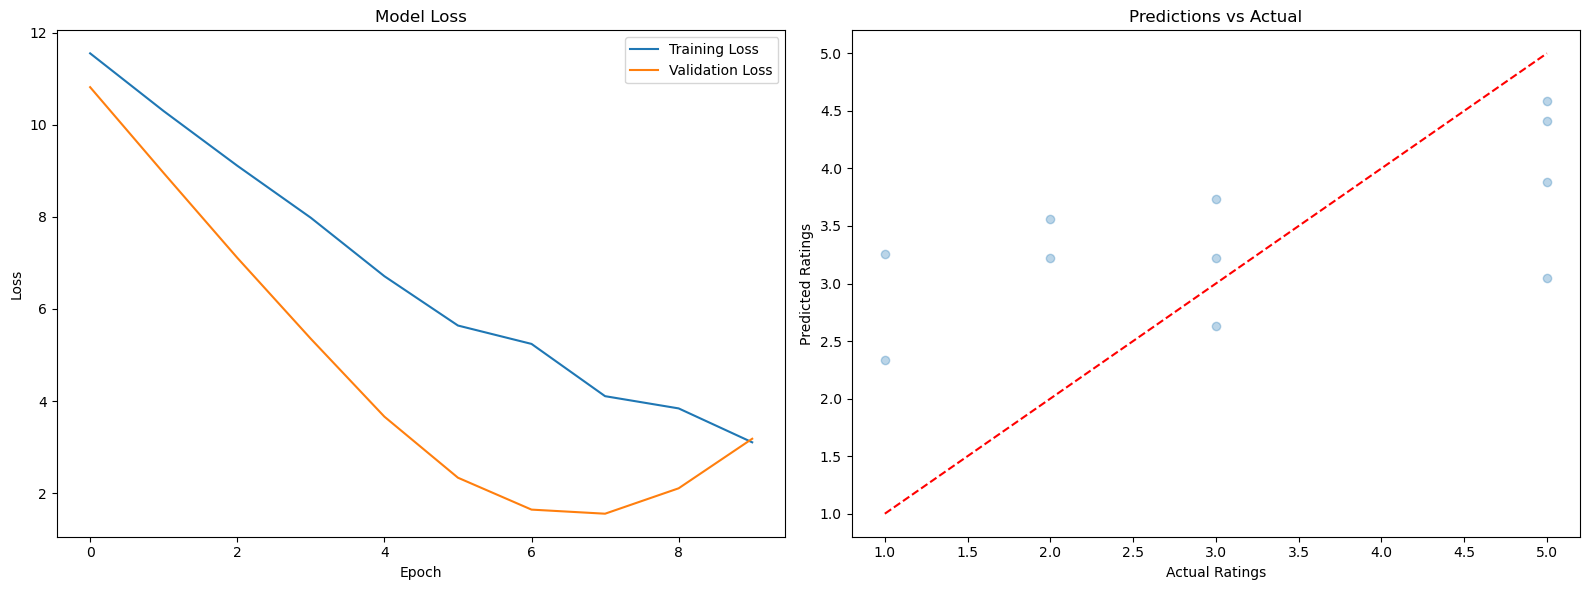

In [76]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Dropout, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

# Define hyperparameter grid
param_grid = {
    'embedding_dim': [16, 32, 48, 64],
    'units1': [64, 128, 256],
    'dropout1': [0.2, 0.3, 0.4],
    'units2': [32, 64, 128],
    'dropout2': [0.2, 0.3, 0.4],
    'learning_rate': [0.0001, 0.0005, 0.001],
    'batch_size': [32, 64, 128]
}

# Function to create model with specific parameters
def create_model(params, user_map, recipe_map, X_features_shape):
    # Define input layers
    user_input = Input(shape=(1,), name='user_input')
    recipe_input = Input(shape=(1,), name='recipe_input')
    features_input = Input(shape=(X_features_shape,), name='features_input')
    
    # Embedding layers
    user_embedding = Embedding(input_dim=len(user_map), 
                              output_dim=params['embedding_dim'])(user_input)
    user_embedding = Flatten()(user_embedding)
    
    recipe_embedding = Embedding(input_dim=len(recipe_map), 
                                output_dim=params['embedding_dim'])(recipe_input)
    recipe_embedding = Flatten()(recipe_embedding)
    
    # Process features
    features_processed = Dense(params['units1'], activation='relu')(features_input)
    features_processed = Dropout(params['dropout1'])(features_processed)
    
    # Combine all features
    combined = Concatenate()([user_embedding, recipe_embedding, features_processed])
    
    # Hidden layers
    x = Dense(params['units1'], activation='relu')(combined)
    x = Dropout(params['dropout1'])(x)
    x = Dense(params['units2'], activation='relu')(x)
    x = Dropout(params['dropout2'])(x)
    
    # Output layer
    output = Dense(1, activation='linear')(x)
    
    # Create model
    model = Model(
        inputs=[user_input, recipe_input, features_input],
        outputs=output
    )
    
    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=params['learning_rate']),
        loss='mean_squared_error',
        metrics=['mae']
    )
    
    return model

# Function to train and evaluate model
def train_evaluate_model(params, X_user_train, X_recipe_train, X_features_train, y_train,
                        X_user_test, X_recipe_test, X_features_test, y_test,
                        user_map, recipe_map):
    try:
        # Create model
        model = create_model(params, user_map, recipe_map, X_features_train.shape[1])
        
        # Callbacks
        callbacks = [
            EarlyStopping(
                monitor='val_loss',
                patience=5,
                restore_best_weights=True,
                verbose=0
            )
        ]
        
        # Train model
        history = model.fit(
            [X_user_train, X_recipe_train, X_features_train],
            y_train,
            validation_data=([X_user_test, X_recipe_test, X_features_test], y_test),
            epochs=10,  # Limit for random search
            batch_size=params['batch_size'],
            callbacks=callbacks,
            verbose=0
        )
        
        # Get validation metrics
        val_mae = min(history.history['val_mae'])
        
        return {
            'model': model, 
            'val_mae': val_mae, 
            'params': params,
            'history': history
        }
    
    except Exception as e:
        print(f"Error with parameters {params}: {str(e)}")
        return {
            'model': None, 
            'val_mae': float('inf'), 
            'params': params,
            'history': None
        }

# Function to perform random grid search
def random_grid_search(param_grid, n_iter, X_user_train, X_recipe_train, X_features_train, y_train,
                      X_user_test, X_recipe_test, X_features_test, y_test,
                      user_map, recipe_map):
    # Generate n_iter random parameter combinations
    param_combinations = []
    for _ in range(n_iter):
        params = {k: random.choice(v) for k, v in param_grid.items()}
        param_combinations.append(params)
    
    # Train and evaluate models
    results = []
    for i, params in enumerate(tqdm(param_combinations, desc="Training models")):
        print(f"\nTraining model {i+1} of {n_iter}")
        print(f"Parameters: {params}")
        
        result = train_evaluate_model(
            params, X_user_train, X_recipe_train, X_features_train, y_train,
            X_user_test, X_recipe_test, X_features_test, y_test,
            user_map, recipe_map
        )
        
        results.append(result)
    
    # Find best model
    best_result = min(results, key=lambda x: x['val_mae'])
    
    return results, best_result

# Main execution
def main():
    # Assuming these variables are already defined in your environment:
    # X_user_train, X_recipe_train, X_features_train, y_train
    # X_user_test, X_recipe_test, X_features_test, y_test
    # user_map, recipe_map
    
    # Set random seed for reproducibility
    np.random.seed(42)
    tf.random.set_seed(42)
    random.seed(42)
    
    # Perform random grid search
    n_iter = 10  # Number of random combinations to try
    results, best_result = random_grid_search(
        param_grid, n_iter, 
        X_user_train, X_recipe_train, X_features_train, y_train,
        X_user_test, X_recipe_test, X_features_test, y_test,
        user_map, recipe_map
    )
    
    # Print best parameters
    print("\n\nBest validation MAE:", best_result['val_mae'])
    print("Best parameters:")
    for param, value in best_result['params'].items():
        print(f"  {param}: {value}")
    
    # Evaluate best model on test set
    best_model = best_result['model']
    if best_model is not None:
        # Make predictions
        predictions = best_model.predict(
            [X_user_test, X_recipe_test, X_features_test]
        )
        
        # Ensure predictions is the right shape
        predictions = predictions.flatten()
        
        # Calculate metrics
        mae = np.mean(np.abs(y_test - predictions))
        mse = np.mean((y_test - predictions)**2)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, predictions)
        
        # Print metrics
        print("\nTest Set Metrics for Best Model:")
        print(f"Mean Absolute Error: {mae:.4f}")
        print(f"Mean Squared Error: {mse:.4f}")
        print(f"Root Mean Squared Error: {rmse:.4f}")
        print(f"R-squared: {r2:.4f}")
        
        # Plot results
        plt.figure(figsize=(16, 6))
        
        # Plot training history
        plt.subplot(1, 2, 1)
        plt.plot(best_result['history'].history['loss'], label='Training Loss')
        plt.plot(best_result['history'].history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        
        # Plot predictions vs actual
        plt.subplot(1, 2, 2)
        plt.scatter(y_test, predictions, alpha=0.3)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
        plt.xlabel('Actual Ratings')
        plt.ylabel('Predicted Ratings')
        plt.title('Predictions vs Actual')
        plt.tight_layout()
        plt.show()
        
        # Return best model for further use if needed
        return best_model, best_result['params']

if __name__ == "__main__":
    main()

original code below

## 2. Multilayer Perception Model (MLP)
Generating ratings + tag preferences

NOTES
- first choice optimizer: Adam
- second choice optimizer: RMSProp
- tuning method: bayesian optimization OR randomr search

### MLP Data Preprocessing

In [324]:
# save the above data as a full df, then drop columns not used for MLP
recipes_full = recipes.copy()
recipes.drop(['name', 'contributor_id', 'nutrition', 'submitted','description', 'steps'], axis=1, inplace=True)

from ast import literal_eval
# apply list transformations for relevant columns
recipes['tags'] = recipes['tags'].apply(literal_eval)
recipes['ingredients'] = recipes['ingredients'].apply(literal_eval)

# display final shape
print('\nRecipes (for training) Shape:', recipes.shape)
print('\n')
recipes.head()


Recipes (for training) Shape: (231636, 6)




,recipe_id,minutes,tags,n_steps,ingredients,n_ingredients
0,137739,55,"[60-minutes-or-less, time-to-make, course, mai...",11,"[winter squash, mexican seasoning, mixed spice...",7
1,31490,30,"[30-minutes-or-less, time-to-make, course, mai...",9,"[prepared pizza crust, sausage patty, eggs, mi...",6
2,112140,130,"[time-to-make, course, preparation, main-dish,...",6,"[ground beef, yellow onions, diced tomatoes, t...",13
3,59389,45,"[60-minutes-or-less, time-to-make, course, mai...",11,"[spreadable cheese with garlic and herbs, new ...",11
4,44061,190,"[weeknight, time-to-make, course, main-ingredi...",5,"[tomato juice, apple cider vinegar, sugar, sal...",8


**Numerical Scaling**

In [325]:
from sklearn.preprocessing import StandardScaler

ratings = interactions.drop(['review', 'date'], axis=1)
recipes_mlp = pd.merge(recipes, ratings, on='recipe_id', how='right')

# scale numeric variables
scaler = StandardScaler()
numeric = ['minutes','n_steps','n_ingredients']
numerical_scaled = scaler.fit_transform(recipes_mlp[numeric])
recipes_mlp[numeric] = numerical_scaled

# handling nutrition column
n_lists = [n.strip('[]').split(',') for n in recipes_full.nutrition]
nutrition_array = np.array(pd.DataFrame(n_lists).apply(lambda x: [int(float(item.strip())) for item in x]))

# scale numeric variables
scaler = StandardScaler()
nutrition_array = scaler.fit_transform(nutrition_array)
nutrition_df = pd.DataFrame(nutrition_array, columns=['n1','n2','n3','n4','n5','n6','n7'], index=recipes_full.recipe_id)
recipes_mlp = pd.merge(recipes_mlp, nutrition_df, on='recipe_id', how='left')

# drop list columns, they need encording
recipes_mlp.drop(['tags', 'ingredients'], axis=1, inplace=True)
recipes_mlp.head()

,recipe_id,minutes,n_steps,n_ingredients,user_id,rating,n1,n2,n3,n4,n5,n6,n7
0,40893,-0.004053,-0.967058,0.013001,38094,4,-0.226515,-0.399495,-0.094111,-0.031430,-0.182684,-0.443717,-0.067955
1,40893,-0.004053,-0.967058,0.013001,1293707,5,-0.226515,-0.399495,-0.094111,-0.031430,-0.182684,-0.443717,-0.067955
2,44394,-0.004107,-0.795227,-1.342046,8937,4,-0.287034,-0.322372,-0.056615,-0.190568,-0.524726,-0.352101,-0.129062
3,85009,-0.004108,-1.138888,1.097039,126440,5,1.943762,3.932259,0.062123,1.969152,2.160300,2.599984,0.323125
4,85009,-0.004108,-1.138888,1.097039,57222,5,1.943762,3.932259,0.062123,1.969152,2.160300,2.599984,0.323125


In [326]:
recipes_mlp.shape

(1132367, 13)

**Categorical Encoding**

In [327]:
# unnest tags list
tags_unnested = recipes.explode('tags')[['recipe_id','tags']]

# identify and filter for most common tags (75th %-ile)
tag_count = tags_unnested.groupby('tags').count().sort_values(by='recipe_id', ascending=False)
common_tags = list(tag_count[tag_count.recipe_id>50000].index)
tags_filtered = tags_unnested[tags_unnested['tags'].isin(common_tags)]

# encode common tags
tags_encoded = pd.get_dummies(tags_filtered)
tags_encoded = tags_encoded.groupby('recipe_id').sum().reset_index()

# merge data
recipes_mlp = pd.merge(recipes_mlp, tags_encoded, on='recipe_id', how='left')
recipes_mlp.shape

(1132367, 30)

# unnest ingredients list
ingredients_unnested = recipes.explode('ingredients')[['recipe_id','ingredients']]

# identify and filter for most common ingredients (>1000)
ingredient_count = ingredients_unnested.groupby('ingredients').count().sort_values(by='recipe_id', ascending=False)
common_ingredients = list(ingredient_count[ingredient_count.recipe_id>50000].index)
ingredients_filtered = ingredients_unnested[ingredients_unnested['ingredients'].isin(common_ingredients)]

# encode common ingredients
ingredients_encoded = pd.get_dummies(ingredients_filtered)
ingredients_encoded = ingredients_encoded.groupby('recipe_id').sum().reset_index()

# merge data
recipes_mlp = pd.merge(recipes_mlp, ingredients_encoded, on='recipe_id',  how='left')
recipes_mlp.shape

In [328]:
recipes_mlp.head()

,recipe_id,minutes,n_steps,n_ingredients,user_id,rating,n1,n2,n3,n4,...,tags_low-in-something,tags_main-dish,tags_main-ingredient,tags_meat,tags_number-of-servings,tags_occasion,tags_preparation,tags_taste-mood,tags_time-to-make,tags_vegetables
0,40893,-0.004053,-0.967058,0.013001,38094,4,-0.226515,-0.399495,-0.094111,-0.031430,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
1,40893,-0.004053,-0.967058,0.013001,1293707,5,-0.226515,-0.399495,-0.094111,-0.031430,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
2,44394,-0.004107,-0.795227,-1.342046,8937,4,-0.287034,-0.322372,-0.056615,-0.190568,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
3,85009,-0.004108,-1.138888,1.097039,126440,5,1.943762,3.932259,0.062123,1.969152,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
4,85009,-0.004108,-1.138888,1.097039,57222,5,1.943762,3.932259,0.062123,1.969152,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


**Sampling**

# referencing 'df' for ease
df = recipes_mlp.copy()

# Sample n users randomly
random_users = df['user_id'].unique()
sampled_users = np.random.choice(random_users, size=10000, replace=False)

# Get all data for these users
df_sample = df[df['user_id'].isin(sampled_users)]

df_sample.to_csv('recipes_mlp_sample.csv')

In [331]:
# referencing 'df' for ease
df = recipes_mlp.copy()

import numpy as np

# Z-score method (remove ratings that are 3 standard deviations from mean)
def remove_outliers_zscore(df, column='rating', threshold=3):
    mean = df[column].mean()
    std = df[column].std()
    
    # Calculate z-score
    z_scores = (df[column] - mean) / std
    
    # Filter data
    return df[abs(z_scores) < threshold]

# IQR method (interquartile range)
def remove_outliers_iqr(df, column='rating'):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter data
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
# Remove users with unusual rating distributions
def remove_unusual_users(df, min_ratings=3, max_ratings=None):
    # Get count of ratings per user
    user_counts = df['user_id'].value_counts()
    
    # Users with enough ratings
    valid_users = user_counts[user_counts >= min_ratings].index
    
    # Optional: remove users with too many ratings
    if max_ratings:
        valid_users = user_counts[(user_counts >= min_ratings) & 
                                 (user_counts <= max_ratings)].index
    
    # Filter data
    return df[df['user_id'].isin(valid_users)]

# Remove users with strange rating patterns
def remove_biased_users(df):
    # Calculate average and std of ratings per user
    user_stats = df.groupby('user_id')['rating'].agg(['mean', 'std']).reset_index()
    
    # Find users with normal rating patterns (not all 5s or all 1s)
    normal_users = user_stats[(user_stats['std'] > 0.5) & 
                             (user_stats['mean'] > 1.5) & 
                             (user_stats['mean'] < 4.5)]['user_id']
    
    # Filter data
    return df[df['user_id'].isin(normal_users)]

# Remove recipes with too few ratings
def remove_unpopular_recipes(df, min_ratings=5):
    recipe_counts = df['recipe_id'].value_counts()
    valid_recipes = recipe_counts[recipe_counts >= min_ratings].index
    return df[df['recipe_id'].isin(valid_recipes)]

# Remove recipes with unusual rating distributions
def remove_controversial_recipes(df):
    # Calculate variance of ratings per recipe
    recipe_variance = df.groupby('recipe_id')['rating'].var().reset_index()
    
    # Remove recipes with extremely high variance
    normal_recipes = recipe_variance[recipe_variance['rating'] < 
                                    recipe_variance['rating'].quantile(0.95)]['recipe_id']
    
    return df[df['recipe_id'].isin(normal_recipes)]

# Pipeline to clean the data
def clean_recommendation_data(df):
    print(f"Original data: {len(df)} rows")
    
    # 1. Remove users with too few ratings
    df = remove_unusual_users(df, min_ratings=5)
    print(f"After removing users with few ratings: {len(df)} rows")
    
    # 2. Remove recipes with too few ratings
    df = remove_unpopular_recipes(df, min_ratings=3)
    print(f"After removing unpopular recipes: {len(df)} rows")
    
    # 3. Remove biased users
    df = remove_biased_users(df)
    print(f"After removing biased users: {len(df)} rows")
    
    # 4. Final outlier removal using IQR
    df = remove_outliers_iqr(df)
    print(f"Final clean data: {len(df)} rows")
    
    return df


# Apply the cleaning
df = clean_recommendation_data(df)

# Sample n users randomly
#random_users = df['user_id'].unique()
#sampled_users = np.random.choice(random_users, size=10000, replace=False)

# Get all data for these users
#df_sample = df[df['user_id'].isin(sampled_users)]

df_sample.to_csv('recipes_mlp_sample.csv')

df.head()

Original data: 1132367 rows
After removing users with few ratings: 872021 rows
After removing unpopular recipes: 697881 rows
After removing biased users: 188605 rows
Final clean data: 169383 rows


,recipe_id,minutes,n_steps,n_ingredients,user_id,rating,n1,n2,n3,n4,...,tags_low-in-something,tags_main-dish,tags_main-ingredient,tags_meat,tags_number-of-servings,tags_occasion,tags_preparation,tags_taste-mood,tags_time-to-make,tags_vegetables
8,134728,-0.004105,0.063925,0.826030,76535,4,-0.132374,-0.412349,-0.055365,0.051927,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
20,225241,-0.004104,1.266739,1.910067,202555,5,-0.189531,-0.412349,-0.070364,-0.069320,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25,225241,-0.004104,1.266739,1.910067,900992,3,-0.189531,-0.412349,-0.070364,-0.069320,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
27,254596,-0.004060,-0.795227,0.826030,224088,4,0.198799,0.101805,0.157113,-0.175412,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
28,254596,-0.004060,-0.795227,0.826030,582223,5,0.198799,0.101805,0.157113,-0.175412,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


**Variable Definition**

In [335]:
# referencing 'df' for ease
#df = recipes_mlp.copy()
df = df_sample.copy()

# only take users with > 1 rating
user_counts = df['user_id'].value_counts()
valid_users = user_counts[user_counts >= 2].index
df = df[df['user_id'].isin(valid_users)]

# developing a new ID for users and recipes starting from 0
user_map = {id: i for i, id in enumerate(df['user_id'].unique())}
recipe_map = {id: i for i, id in enumerate(df['recipe_id'].unique())}

# due to the size of the data, we will need to use embedding on the user and recipes ID's
df['user_id_mapped'] = df['user_id'].map(user_map)
df['recipe_id_mapped'] = df['recipe_id'].map(recipe_map)

# creating user and recipe features separate from main features
X_user = df['user_id_mapped'].values
X_recipe = df['recipe_id_mapped'].values

# selecting target and X features
target = 'rating'
X_features = df.drop([target,'user_id_mapped','recipe_id_mapped','user_id','recipe_id'], axis=1).values  
X_features = np.nan_to_num(X_features, nan=0)
y = df[target].values

**Train Test Split**

In [336]:
from sklearn.model_selection import train_test_split

indices = np.arange(len(y))
train_indices, test_indices = train_test_split(
    range(len(df)),
    test_size=0.2,
    stratify=df['user_id'],  # ensure that users show up in both train and test
    random_state=42
)

X_user_train = X_user[train_indices]
X_user_test = X_user[test_indices]

X_recipe_train = X_recipe[train_indices]
X_recipe_test = X_recipe[test_indices]

X_features_train = X_features[train_indices]
X_features_test = X_features[test_indices]

y_train = y[train_indices]
y_test = y[test_indices]

### Model Training

In [339]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Dropout, Concatenate
from tensorflow.keras.optimizers import Adam

# Define input layers
user_input = Input(shape=(1,), name='user_input')
recipe_input = Input(shape=(1,), name='recipe_input')
features_input = Input(shape=(X_features.shape[1],), name='features_input')

# Embedding layers for users and recipes
user_embedding = Embedding(input_dim=len(user_map), output_dim=32)(user_input)
user_embedding = Flatten()(user_embedding)

recipe_embedding = Embedding(input_dim=len(recipe_map), output_dim=32)(recipe_input)
recipe_embedding = Flatten()(recipe_embedding)

# Combine all features
combined = Concatenate()([user_embedding, recipe_embedding, features_input])

# Hidden layers
x = Dense(256, activation='relu')(combined)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)

# Output layer for rating prediction
output = Dense(1, activation='linear')(x)


# Create and compile model
model = Model(
    inputs=[user_input, recipe_input, features_input],
    outputs=output
)

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mae']
)

model.fit(
    [X_user_train, X_recipe_train, X_features_train],
    y_train,
    validation_data=([X_user_test, X_recipe_test, X_features_test], y_test),
    epochs=20,
    batch_size=32,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/20
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.7350 - mae: 1.1078 - val_loss: 1.1418 - val_mae: 0.7768
Epoch 2/20
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.2134 - mae: 0.7163 - val_loss: 1.4935 - val_mae: 1.0215
Epoch 3/20
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8808 - mae: 0.6113 - val_loss: 1.4292 - val_mae: 0.9777
Epoch 4/20
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4701 - mae: 0.4587 - val_loss: 1.2163 - val_mae: 0.7705
Epoch 5/20
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3650 - mae: 0.3876 - val_loss: 1.2554 - val_mae: 0.7654
Epoch 6/20
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2962 - mae: 0.3286 - val_loss: 1.2877 - val_mae: 0.6384


In [337]:
# UPDATED

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Dropout, Concatenate, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define input layers
user_input = Input(shape=(1,), name='user_input')
recipe_input = Input(shape=(1,), name='recipe_input')
features_input = Input(shape=(X_features.shape[1],), name='features_input')

# Process each input branch separately
# User embedding branch
user_embedding = Embedding(input_dim=len(user_map), output_dim=64)(user_input)
user_embedding = Flatten()(user_embedding)
user_branch = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(user_embedding)
user_branch = BatchNormalization()(user_branch)
user_branch = Dropout(0.3)(user_branch)

# Recipe embedding branch
recipe_embedding = Embedding(input_dim=len(recipe_map), output_dim=64)(recipe_input)
recipe_embedding = Flatten()(recipe_embedding)
recipe_branch = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(recipe_embedding)
recipe_branch = BatchNormalization()(recipe_branch)
recipe_branch = Dropout(0.3)(recipe_branch)

# Features branch
features_branch = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(features_input)
features_branch = BatchNormalization()(features_branch)
features_branch = Dropout(0.4)(features_branch)

# Combine all features
combined = Concatenate()([user_branch, recipe_branch, features_branch])

# Hidden layers with increased regularization
x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(combined)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)

# Output layer for rating prediction
output = Dense(1, activation='linear', kernel_regularizer=l2(0.01))(x)

# Create and compile model
model = Model(
    inputs=[user_input, recipe_input, features_input],
    outputs=output
)

# Use lower learning rate
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='mean_squared_error',
    metrics=['mae']
)

# Define learning rate scheduler
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=0.0001,
    verbose=1
)

# Train with callbacks
history = model.fit(
    [X_user_train, X_recipe_train, X_features_train],
    y_train,
    validation_data=([X_user_test, X_recipe_test, X_features_test], y_test),
    epochs=50,  # Increase max epochs since we have early stopping
    batch_size=64,  # Try a larger batch size
    callbacks=[
        EarlyStopping(
            monitor='val_loss',
            patience=8,  # Increased patience
            restore_best_weights=True,
            verbose=1
        ),
        lr_scheduler
    ]
)

Epoch 1/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 16.7300 - mae: 3.6783 - val_loss: 2.6754 - val_mae: 1.1967 - learning_rate: 5.0000e-04
Epoch 2/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.7275 - mae: 1.0372 - val_loss: 1.9808 - val_mae: 0.7999 - learning_rate: 5.0000e-04
Epoch 3/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 2.2498 - mae: 0.8347 - val_loss: 1.8962 - val_mae: 0.7600 - learning_rate: 5.0000e-04
Epoch 4/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 2.0648 - mae: 0.7687 - val_loss: 1.8029 - val_mae: 0.6916 - learning_rate: 5.0000e-04
Epoch 5/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.9548 - mae: 0.7283 - val_loss: 1.7430 - val_mae: 0.6763 - learning_rate: 5.0000e-04
Epoch 6/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.8156 - mae: 0.6828 - val_loss: 1.6853 - val_mae: 0.6435 - learning_rate: 5.0000e-04
Epoch 7/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 1.7088 - mae: 0.6515 - val_loss: 1.6743 - val_mae: 0.6086 - le

In [340]:
# Evaluate on test set
test_loss, test_mae = model.evaluate(
    [X_user_test, X_recipe_test, X_features_test],
    y_test,
    verbose=1
)

print(f"Test Mean Absolute Error: {test_mae:.4f}")

# Make predictions
predictions = model.predict([X_user_test, X_recipe_test, X_features_test])

# Calculate additional metrics
from sklearn.metrics import mean_squared_error, r2_score

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, predictions.flatten()))
print(f"RMSE: {rmse:.4f}")

# R-squared
r2 = r2_score(y_test, predictions)
print(f"R²: {r2:.4f}")

253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 1.1202 - mae: 0.7675
Test Mean Absolute Error: 0.7768
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step
RMSE: 1.0686
R²: -0.0216


In [42]:
# Build a Tag Preference Model

## 3 . User-User Collaborative Filtering (CF)
Creating recommendations

In [76]:
def hybrid_mlp_user_cf_recommendations(user_id, df, X_features, n_similar_users=10):
    """Optimized version to handle large datasets"""
    
    # get recipes rated by target user
    target_user_recipes = set(df[df['user_id'] == user_id]['recipe_id'])
    if not target_user_recipes:
        return []  # If user hasn't rated anything, return empty list

    # find users who rated at least one of the same recipes
    potential_similar_users = df[df['recipe_id'].isin(target_user_recipes)]['user_id'].unique()
    potential_similar_users = [u for u in potential_similar_users if u != user_id]

    similarities = []
    for other_user in potential_similar_users:
        # get ratings for recipes both users have rated
        other_user_recipes = set(df[df['user_id'] == other_user]['recipe_id'])
        common_recipes = target_user_recipes.intersection(other_user_recipes)
        
        if len(common_recipes) < 2:  # Need at least 2 common recipes for meaningful similarity
            continue
            
        # Get ratings vectors for common recipes
        common_recipes = list(common_recipes)
        
        target_ratings = []
        other_ratings = []

        for recipe in common_recipes:
            target_rating = df[(df['user_id'] == user_id) & (df['recipe_id'] == recipe)]['rating'].iloc[0]
            other_rating = df[(df['user_id'] == other_user) & (df['recipe_id'] == recipe)]['rating'].iloc[0]
            
            target_ratings.append(target_rating)
            other_ratings.append(other_rating)
        
        # Calculate cosine similarity manually for these two vectors
        dot_product = sum(a * b for a, b in zip(target_ratings, other_ratings))
        norm_target = np.sqrt(sum(a * a for a in target_ratings))
        norm_other = np.sqrt(sum(b * b for b in other_ratings))
        
        if norm_target == 0 or norm_other == 0:
            similarity = 0
        else:
            similarity = dot_product / (norm_target * norm_other)
        
        similarities.append((other_user, similarity))
   
    # Sort by similarity and take top N
    similar_users = sorted(similarities, key=lambda x: x[1], reverse=True)[:n_similar_users]
    
    # 3. Get candidate recipes from similar users
    candidate_recipes = set()
    for similar_user, similarity in similar_users:
        if similarity <= 0:
            continue
            
        similar_user_ratings = df[(df['user_id'] == similar_user) & (df['rating'] >= 4)]
        for _, row in similar_user_ratings.iterrows():
            recipe_id = row['recipe_id']
            if recipe_id not in target_user_recipes:
                candidate_recipes.add(recipe_id)
    
    if not candidate_recipes:
        return []
        
    candidate_recipes = list(candidate_recipes)
    user_input = np.array([user_id] * len(candidate_recipes))
    recipe_input = np.array(candidate_recipes)
    
    recipe_features = df.loc[df.recipe_id.isin(common_recipes), ~df.columns.isin(['user_id','recipe_id','rating'])]
    
    
    return user_input,recipe_input,recipe_features

user_input,recipe_input,recipe_features = hybrid_mlp_user_cf_recommendations(user_id=38094, 
                                                                               df=df, 
                                                                               X_features=X_features, 
                                                                               n_similar_users=5)
